# UFC Classification Project by Luigi Fiori


For this project I will be acting as a consultant for a bet site firm and we will be dealing with a classification problem. 

In particular, have been asked to predict who is going to win a potential fight.

Our goal is to create a Machine Learning Model such that we can get some valuable predictions for our company.

We will be working with UFC data containing information about fights from 1993 up till today.

![https://raw.githubusercontent.com/illumi91/dsc-mod-5-project-online-ds-pt-051319/master/images/uf.jpeg](https://raw.githubusercontent.com/illumi91/dsc-mod-5-project-online-ds-pt-051319/master/images/uf.jpeg)

The Database can be found in Keggle and you can download it [here](https://www.kaggle.com/rajeevw/ufcdata).

We'll be following the OSEMN methodology:

1.Obtain

2.Scrub

3.Explore

4.Model

5.Interpret

# Import Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, roc_curve, auc, f1_score, confusion_matrix
from yellowbrick.classifier import ConfusionMatrix
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')

# Load the Data

In [2]:
df = pd.read_csv('data_93.csv')
df.head()

,R_fighter,B_fighter,Referee,date,location,Winner,title_bout,weight_class,no_of_rounds,B_current_lose_streak,...,R_win_by_KO/TKO,R_win_by_Submission,R_win_by_TKO_Doctor_Stoppage,R_wins,R_Stance,R_Height_cms,R_Reach_cms,R_Weight_lbs,B_age,R_age
0,Henry Cejudo,Marlon Moraes,Marc Goddard,2019-06-08,"Chicago, Illinois, USA",Red,True,Bantamweight,5,0.0,...,2.0,0.0,0.0,8.0,Orthodox,162.56,162.56,135.0,31.0,32.0
1,Valentina Shevchenko,Jessica Eye,Robert Madrigal,2019-06-08,"Chicago, Illinois, USA",Red,True,Women's Flyweight,5,0.0,...,0.0,2.0,0.0,5.0,Southpaw,165.10,167.64,125.0,32.0,31.0
2,Tony Ferguson,Donald Cerrone,Dan Miragliotta,2019-06-08,"Chicago, Illinois, USA",Red,False,Lightweight,3,0.0,...,3.0,6.0,1.0,14.0,Orthodox,180.34,193.04,155.0,36.0,35.0
3,Jimmie Rivera,Petr Yan,Kevin MacDonald,2019-06-08,"Chicago, Illinois, USA",Blue,False,Bantamweight,3,0.0,...,1.0,0.0,0.0,6.0,Orthodox,162.56,172.72,135.0,26.0,29.0
4,Tai Tuivasa,Blagoy Ivanov,Dan Miragliotta,2019-06-08,"Chicago, Illinois, USA",Blue,False,Heavyweight,3,0.0,...,2.0,0.0,0.0,3.0,Southpaw,187.96,190.50,264.0,32.0,26.0


In [3]:
df[(df['R_fighter'] == 'Conor McGregor') | (df['B_fighter'] == 'Conor McGregor')] 

,R_fighter,B_fighter,Referee,date,location,Winner,title_bout,weight_class,no_of_rounds,B_current_lose_streak,...,R_win_by_KO/TKO,R_win_by_Submission,R_win_by_TKO_Doctor_Stoppage,R_wins,R_Stance,R_Height_cms,R_Reach_cms,R_Weight_lbs,B_age,R_age
347,Khabib Nurmagomedov,Conor McGregor,Herb Dean,2018-10-06,"Las Vegas, Nevada, USA",Red,True,Lightweight,5,0.0,...,2.0,2.0,0.0,10.0,Orthodox,177.80,177.80,155.0,30.0,30.0
1245,Eddie Alvarez,Conor McGregor,John McCarthy,2016-11-12,"New York City, New York, USA",Blue,True,Lightweight,5,0.0,...,1.0,0.0,0.0,3.0,Orthodox,175.26,175.26,155.0,28.0,32.0
1348,Nate Diaz,Conor McGregor,John McCarthy,2016-08-20,"Las Vegas, Nevada, USA",Blue,False,Welterweight,5,1.0,...,2.0,9.0,0.0,14.0,Southpaw,182.88,193.04,170.0,28.0,31.0
1553,Conor McGregor,Nate Diaz,Herb Dean,2016-03-05,"Las Vegas, Nevada, USA",Blue,False,Welterweight,5,0.0,...,6.0,0.0,0.0,7.0,Southpaw,175.26,187.96,155.0,30.0,27.0
1654,Jose Aldo,Conor McGregor,John McCarthy,2015-12-12,"Las Vegas, Nevada, USA",Blue,True,Featherweight,5,0.0,...,2.0,0.0,0.0,7.0,Orthodox,170.18,177.80,145.0,27.0,29.0
1866,Chad Mendes,Conor McGregor,Herb Dean,2015-07-11,"Las Vegas, Nevada, USA",Blue,True,Featherweight,5,0.0,...,5.0,0.0,0.0,8.0,Orthodox,167.64,167.64,145.0,26.0,30.0
2091,Conor McGregor,Dennis Siver,Herb Dean,2015-01-18,"Boston, Massachusetts, USA",Red,False,Featherweight,5,0.0,...,3.0,0.0,0.0,4.0,Southpaw,175.26,187.96,155.0,36.0,26.0
2240,Dustin Poirier,Conor McGregor,Herb Dean,2014-09-27,"Las Vegas, Nevada, USA",Blue,False,Featherweight,3,0.0,...,2.0,3.0,0.0,8.0,Southpaw,175.26,182.88,155.0,26.0,25.0
2332,Conor McGregor,Diego Brandao,Leon Roberts,2014-07-19,"Dublin, Leinster, Ireland",Red,False,Featherweight,5,1.0,...,1.0,0.0,0.0,2.0,Southpaw,175.26,187.96,155.0,27.0,26.0
2786,Conor McGregor,Max Holloway,Herb Dean,2013-08-17,"Boston, Massachusetts, USA",Red,False,Featherweight,3,1.0,...,1.0,0.0,0.0,1.0,Southpaw,175.26,187.96,155.0,21.0,25.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5144 entries, 0 to 5143
Columns: 145 entries, R_fighter to R_age
dtypes: bool(1), float64(134), int64(1), object(9)
memory usage: 5.7+ MB


The Dataframe contains 145 columns and 5144 rows.

First thing I wanna check what those columns are about and if I'm gonna need all of them or I can drop some.

In [5]:
list(df.columns)

['R_fighter',
 'B_fighter',
 'Referee',
 'date',
 'location',
 'Winner',
 'title_bout',
 'weight_class',
 'no_of_rounds',
 'B_current_lose_streak',
 'B_current_win_streak',
 'B_draw',
 'B_avg_BODY_att',
 'B_avg_BODY_landed',
 'B_avg_CLINCH_att',
 'B_avg_CLINCH_landed',
 'B_avg_DISTANCE_att',
 'B_avg_DISTANCE_landed',
 'B_avg_GROUND_att',
 'B_avg_GROUND_landed',
 'B_avg_HEAD_att',
 'B_avg_HEAD_landed',
 'B_avg_KD',
 'B_avg_LEG_att',
 'B_avg_LEG_landed',
 'B_avg_PASS',
 'B_avg_REV',
 'B_avg_SIG_STR_att',
 'B_avg_SIG_STR_landed',
 'B_avg_SIG_STR_pct',
 'B_avg_SUB_ATT',
 'B_avg_TD_att',
 'B_avg_TD_landed',
 'B_avg_TD_pct',
 'B_avg_TOTAL_STR_att',
 'B_avg_TOTAL_STR_landed',
 'B_longest_win_streak',
 'B_losses',
 'B_avg_opp_BODY_att',
 'B_avg_opp_BODY_landed',
 'B_avg_opp_CLINCH_att',
 'B_avg_opp_CLINCH_landed',
 'B_avg_opp_DISTANCE_att',
 'B_avg_opp_DISTANCE_landed',
 'B_avg_opp_GROUND_att',
 'B_avg_opp_GROUND_landed',
 'B_avg_opp_HEAD_att',
 'B_avg_opp_HEAD_landed',
 'B_avg_opp_KD',
 'B_av

As we can see some of the columns are pretty similar, the only difference is the presence of "opp" inside the column's name.

After a closer look at the meaning of those column's name I decide to drop them from the Dataframe.

In fact they refer to the hits produced by the opponent, making our columns redundant.

In [6]:
df = df[df.columns.drop(list(df.filter(regex='opp')))]

In [7]:
list(df.columns)

['R_fighter',
 'B_fighter',
 'Referee',
 'date',
 'location',
 'Winner',
 'title_bout',
 'weight_class',
 'no_of_rounds',
 'B_current_lose_streak',
 'B_current_win_streak',
 'B_draw',
 'B_avg_BODY_att',
 'B_avg_BODY_landed',
 'B_avg_CLINCH_att',
 'B_avg_CLINCH_landed',
 'B_avg_DISTANCE_att',
 'B_avg_DISTANCE_landed',
 'B_avg_GROUND_att',
 'B_avg_GROUND_landed',
 'B_avg_HEAD_att',
 'B_avg_HEAD_landed',
 'B_avg_KD',
 'B_avg_LEG_att',
 'B_avg_LEG_landed',
 'B_avg_PASS',
 'B_avg_REV',
 'B_avg_SIG_STR_att',
 'B_avg_SIG_STR_landed',
 'B_avg_SIG_STR_pct',
 'B_avg_SUB_ATT',
 'B_avg_TD_att',
 'B_avg_TD_landed',
 'B_avg_TD_pct',
 'B_avg_TOTAL_STR_att',
 'B_avg_TOTAL_STR_landed',
 'B_longest_win_streak',
 'B_losses',
 'B_total_rounds_fought',
 'B_total_time_fought(seconds)',
 'B_total_title_bouts',
 'B_win_by_Decision_Majority',
 'B_win_by_Decision_Split',
 'B_win_by_Decision_Unanimous',
 'B_win_by_KO/TKO',
 'B_win_by_Submission',
 'B_wins',
 'B_Stance',
 'B_Height_cms',
 'B_Reach_cms',
 'B_Weigh

Let's check the labels present in the 'Winner' column.

In [8]:
df['Winner'].value_counts(normalize=True)

Red     0.674572
Blue    0.309292
Draw    0.016135
Name: Winner, dtype: float64

In the next step I'm going to remove the 'Draw' label being  representative of less than 2% of the overall data.

In [9]:
df = df[df['Winner'] != 'Draw']
df['Winner'].value_counts(normalize=True)

Red     0.685635
Blue    0.314365
Name: Winner, dtype: float64

# EDA

First thing I'm going to check are the Nan values present in the Dataframe.
I'll deal with them based on the information we have.

In [10]:
df.isnull().sum()

R_fighter                          0
B_fighter                          0
Referee                           22
date                               0
location                           0
Winner                             0
title_bout                         0
weight_class                       0
no_of_rounds                       0
B_current_lose_streak              0
B_current_win_streak               0
B_draw                             0
B_avg_BODY_att                  1241
B_avg_BODY_landed               1241
B_avg_CLINCH_att                1241
B_avg_CLINCH_landed             1241
B_avg_DISTANCE_att              1241
B_avg_DISTANCE_landed           1241
B_avg_GROUND_att                1241
B_avg_GROUND_landed             1241
B_avg_HEAD_att                  1241
B_avg_HEAD_landed               1241
B_avg_KD                        1241
B_avg_LEG_att                   1241
B_avg_LEG_landed                1241
B_avg_PASS                      1241
B_avg_REV                       1241
B

As we can see we miss some data.

In this case unfortunately we have to drop the relative rows. 

The missing Data relates to columns that we'll be using and that we are not able to replace with other values.

In [11]:
df.dropna(inplace=True)
df.isnull().sum()

R_fighter                       0
B_fighter                       0
Referee                         0
date                            0
location                        0
Winner                          0
title_bout                      0
weight_class                    0
no_of_rounds                    0
B_current_lose_streak           0
B_current_win_streak            0
B_draw                          0
B_avg_BODY_att                  0
B_avg_BODY_landed               0
B_avg_CLINCH_att                0
B_avg_CLINCH_landed             0
B_avg_DISTANCE_att              0
B_avg_DISTANCE_landed           0
B_avg_GROUND_att                0
B_avg_GROUND_landed             0
B_avg_HEAD_att                  0
B_avg_HEAD_landed               0
B_avg_KD                        0
B_avg_LEG_att                   0
B_avg_LEG_landed                0
B_avg_PASS                      0
B_avg_REV                       0
B_avg_SIG_STR_att               0
B_avg_SIG_STR_landed            0
B_avg_SIG_STR_

# Features importance through Random Forest

At this point I want to check between all the features that I have those features that are more important in terms of overall impact.

To do so I'm going to create a Random Forest Model, after that I can have a first look at the most important features with the "feature_importances" attribute.

I'll do so in order to have a good starting point for my preditive model.

In [12]:
df.head(3)

,R_fighter,B_fighter,Referee,date,location,Winner,title_bout,weight_class,no_of_rounds,B_current_lose_streak,...,R_win_by_Decision_Unanimous,R_win_by_KO/TKO,R_win_by_Submission,R_wins,R_Stance,R_Height_cms,R_Reach_cms,R_Weight_lbs,B_age,R_age
0,Henry Cejudo,Marlon Moraes,Marc Goddard,2019-06-08,"Chicago, Illinois, USA",Red,True,Bantamweight,5,0.0,...,4.0,2.0,0.0,8.0,Orthodox,162.56,162.56,135.0,31.0,32.0
1,Valentina Shevchenko,Jessica Eye,Robert Madrigal,2019-06-08,"Chicago, Illinois, USA",Red,True,Women's Flyweight,5,0.0,...,2.0,0.0,2.0,5.0,Southpaw,165.10,167.64,125.0,32.0,31.0
2,Tony Ferguson,Donald Cerrone,Dan Miragliotta,2019-06-08,"Chicago, Illinois, USA",Red,False,Lightweight,3,0.0,...,3.0,3.0,6.0,14.0,Orthodox,180.34,193.04,155.0,36.0,35.0


In [13]:
X = df.drop('Winner', axis=1)
y = df['Winner']

I need to remove to column that are 'object' because this Machine Learning Model can't handle 'strings'.

In [14]:
X = X.select_dtypes(exclude=['object'])
list(X.dtypes)

[dtype('bool'),
 dtype('int64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64')

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [16]:
# Create decision tree classifer object
clf = RandomForestClassifier(random_state=0, n_jobs=-1)

# Train model
model = clf.fit(X_train, y_train)

After fitting our model we are going to create a dictionary to hold our sorted features so that we can have a better understanding of the features importance.

In [17]:
feats = {} # a dict to hold feature_name: feature_importance
for feature, importance in zip(X.columns, model.feature_importances_):
    feats[feature] = importance #add the name/value pair 

importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Gini-importance'})
importances.sort_values(by='Gini-importance',ascending=False,inplace=True)
importances.head(30)
#importances.sort_values(by='Gini-importance').plot(kind='bar', rot=45, figsize=(12,8))

,Gini-importance
R_avg_GROUND_landed,0.021922
B_avg_HEAD_landed,0.021324
R_avg_SIG_STR_pct,0.020784
R_total_time_fought(seconds),0.020753
B_avg_BODY_att,0.020543
B_total_time_fought(seconds),0.019827
B_avg_DISTANCE_att,0.019350
B_avg_HEAD_att,0.018842
B_avg_TOTAL_STR_att,0.018837
R_avg_SIG_STR_landed,0.018744


Here on top we can see our 30 best features for our model.

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3151 entries, 0 to 5008
Data columns (total 95 columns):
R_fighter                       3151 non-null object
B_fighter                       3151 non-null object
Referee                         3151 non-null object
date                            3151 non-null object
location                        3151 non-null object
Winner                          3151 non-null object
title_bout                      3151 non-null bool
weight_class                    3151 non-null object
no_of_rounds                    3151 non-null int64
B_current_lose_streak           3151 non-null float64
B_current_win_streak            3151 non-null float64
B_draw                          3151 non-null float64
B_avg_BODY_att                  3151 non-null float64
B_avg_BODY_landed               3151 non-null float64
B_avg_CLINCH_att                3151 non-null float64
B_avg_CLINCH_landed             3151 non-null float64
B_avg_DISTANCE_att              3151 non-

## Subtract Blue fighters columns to Red fighter columns for different features.

My intention through this process is to possibly find some new important and valuable features for the model that we'll build later on.

We will start with physical attributes such weight, height and so on.

Later we will deal with strikes related features such strike on the ground, standing etc.

For each of them I'll be also plotting a Boxplot and an Histogram

In [19]:
df['WEIGHT_DIFF'] = df['R_Weight_lbs'] \
                        - df['B_Weight_lbs']

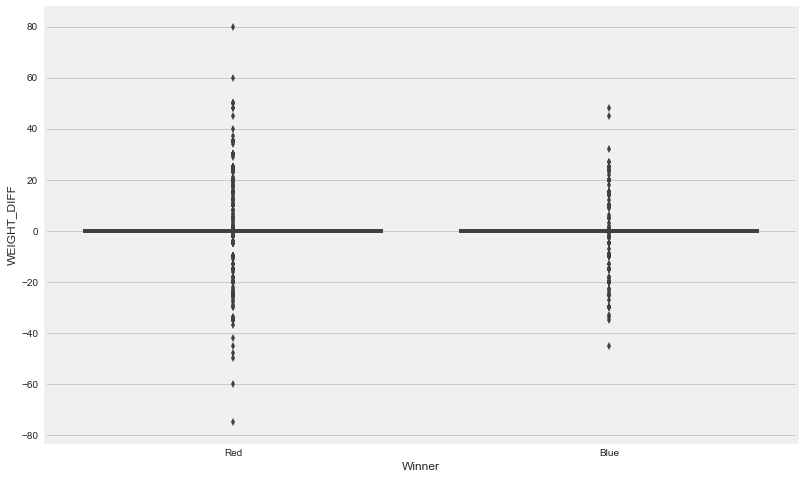

In [20]:
plt.figure(figsize=(12,8))
sns.boxplot(x='Winner', y= 'WEIGHT_DIFF', data=df);

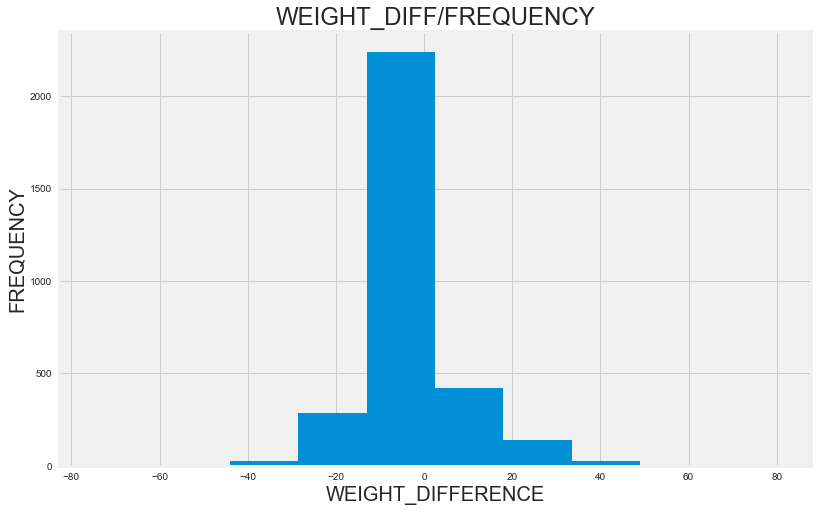

In [21]:
plt.figure(figsize=(12,8))
df['WEIGHT_DIFF'].hist()
plt.xlabel('WEIGHT_DIFFERENCE', fontsize=20)
plt.ylabel('FREQUENCY', fontsize=20)
plt.title('WEIGHT_DIFF/FREQUENCY', fontsize=24);

The fighter with more than 80 pounds difference is an outlier. Let's remove it.

In [22]:
df = df[df['WEIGHT_DIFF'] < 75]

In [23]:
df['REACH_DIFF'] = df['R_Reach_cms'] \
                        - df['B_Reach_cms']

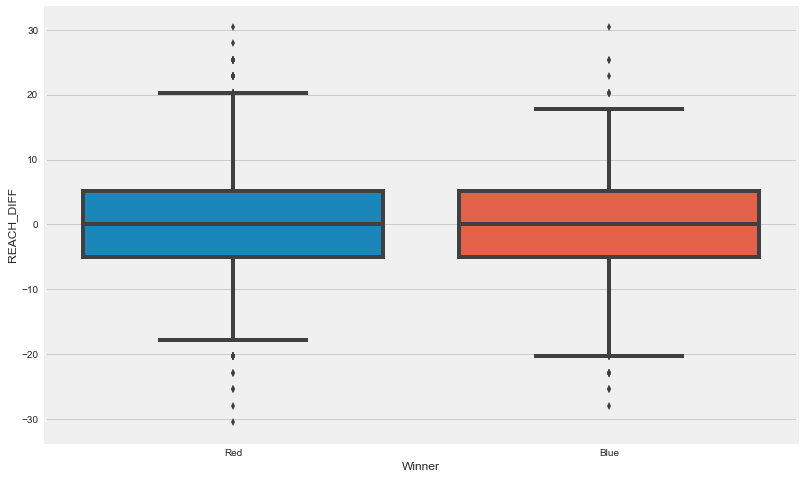

In [24]:
plt.figure(figsize=(12,8))
sns.boxplot(x='Winner', y= 'REACH_DIFF', data=df);

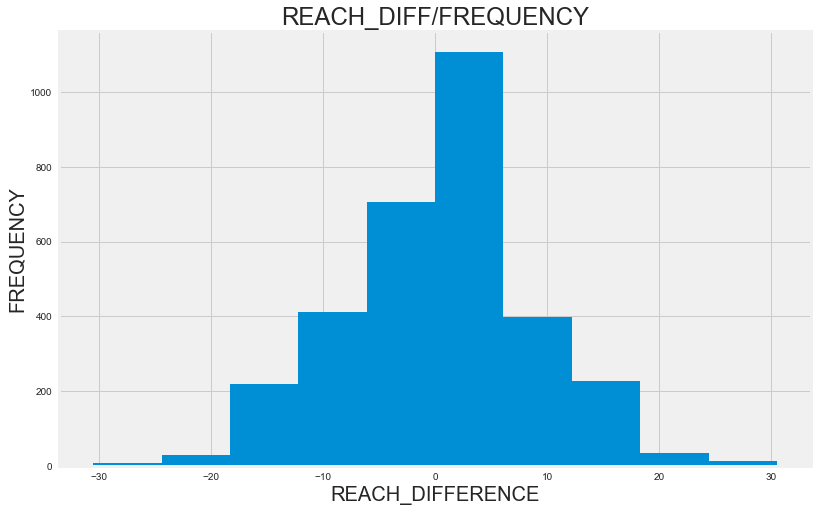

In [25]:
plt.figure(figsize=(12,8))
df['REACH_DIFF'].hist()
plt.xlabel('REACH_DIFFERENCE', fontsize=20)
plt.ylabel('FREQUENCY', fontsize=20)
plt.title('REACH_DIFF/FREQUENCY', fontsize=24);

In [26]:
df['HEIGHT_DIFF'] = df['R_Height_cms'] \
                        - df['B_Height_cms']

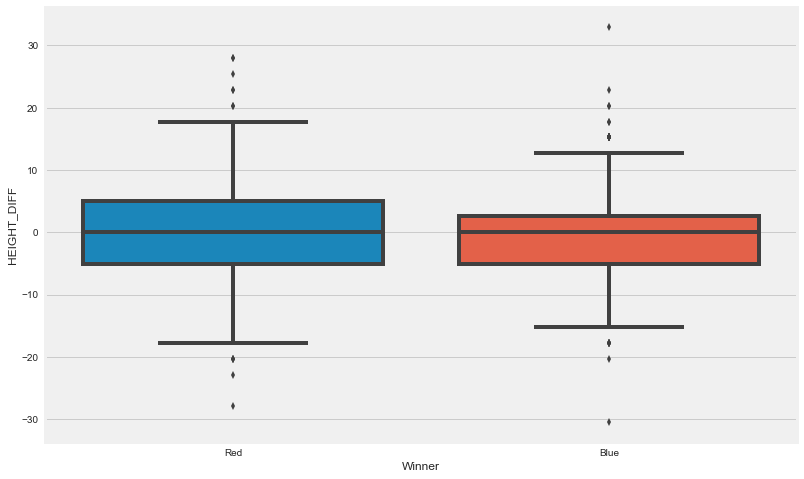

In [27]:
plt.figure(figsize=(12,8))
sns.boxplot(x='Winner', y= 'HEIGHT_DIFF', data=df);

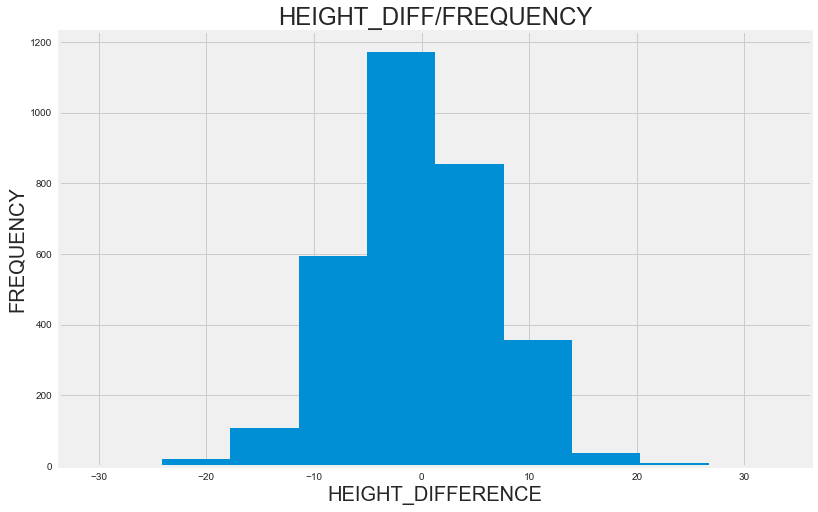

In [28]:
plt.figure(figsize=(12,8))
df['HEIGHT_DIFF'].hist()
plt.xlabel('HEIGHT_DIFFERENCE', fontsize=20)
plt.ylabel('FREQUENCY', fontsize=20)
plt.title('HEIGHT_DIFF/FREQUENCY', fontsize=24);

In [29]:
df['AGE_DIFF'] = df['R_age'] \
                        - df['B_age']

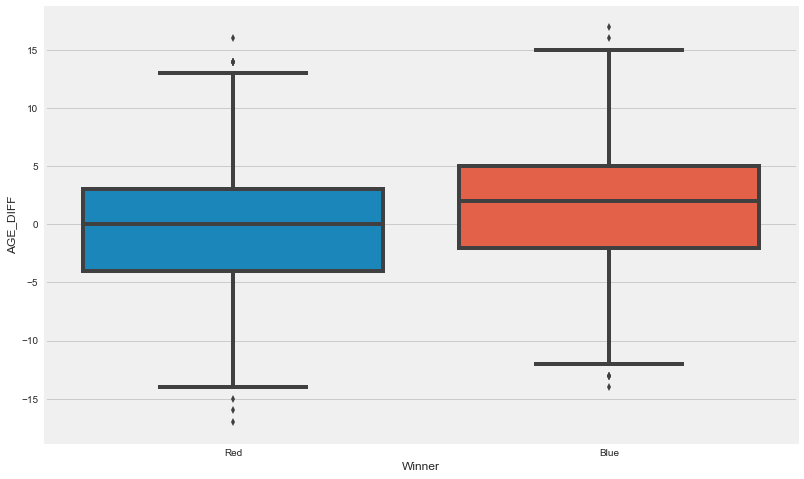

In [30]:
plt.figure(figsize=(12,8))
sns.boxplot(x='Winner', y= 'AGE_DIFF', data=df);

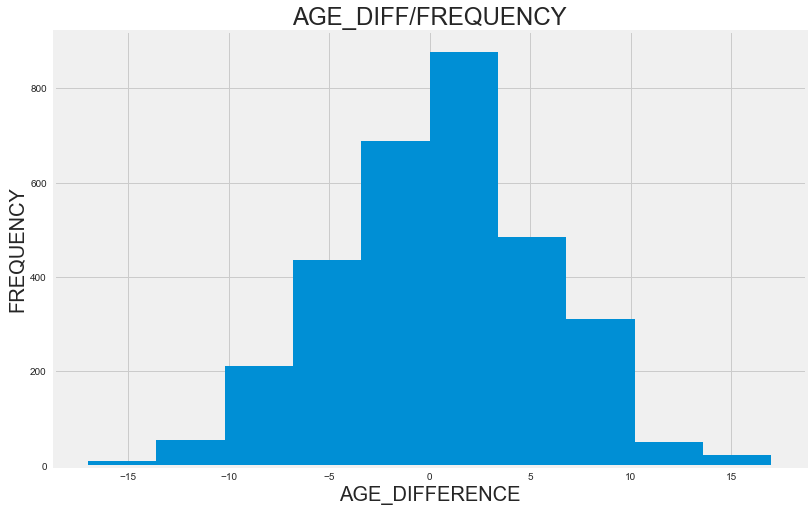

In [31]:
plt.figure(figsize=(12,8))
df['AGE_DIFF'].hist()
plt.xlabel('AGE_DIFFERENCE', fontsize=20)
plt.ylabel('FREQUENCY', fontsize=20)
plt.title('AGE_DIFF/FREQUENCY', fontsize=24);

In [32]:
df['KO_DIFF'] = df['R_avg_KD'] \
                        - df['B_avg_KD']

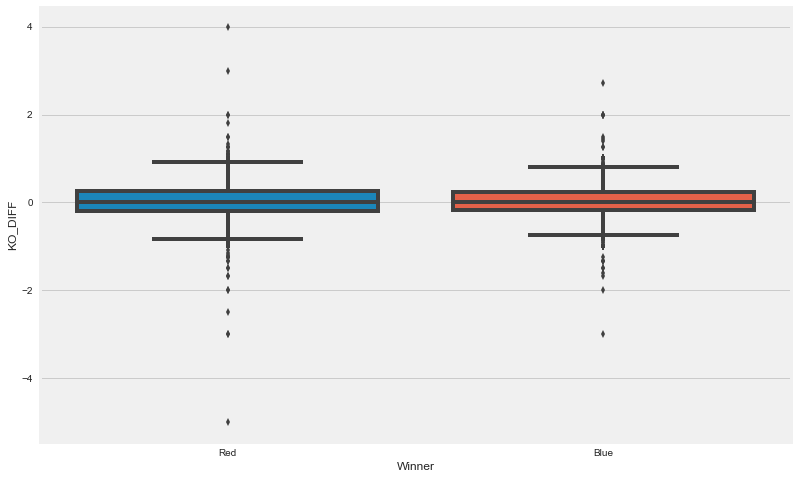

In [33]:
plt.figure(figsize=(12,8))
sns.boxplot(x='Winner', y= 'KO_DIFF', data=df);

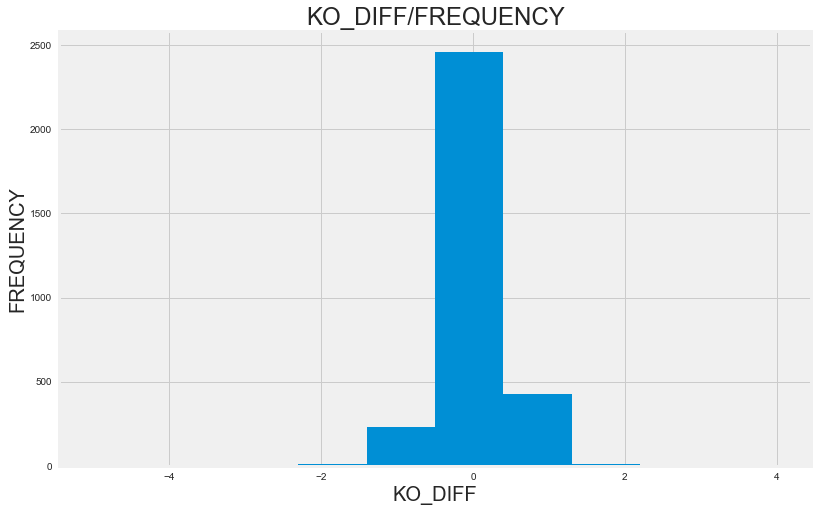

In [34]:
plt.figure(figsize=(12,8))
df['KO_DIFF'].hist()
plt.xlabel('KO_DIFF', fontsize=20)
plt.ylabel('FREQUENCY', fontsize=20)
plt.title('KO_DIFF/FREQUENCY', fontsize=24);

In [35]:
df['TOT_STR_DIFF'] = df['R_avg_TOTAL_STR_landed'] \
                        - df['B_avg_TOTAL_STR_landed']

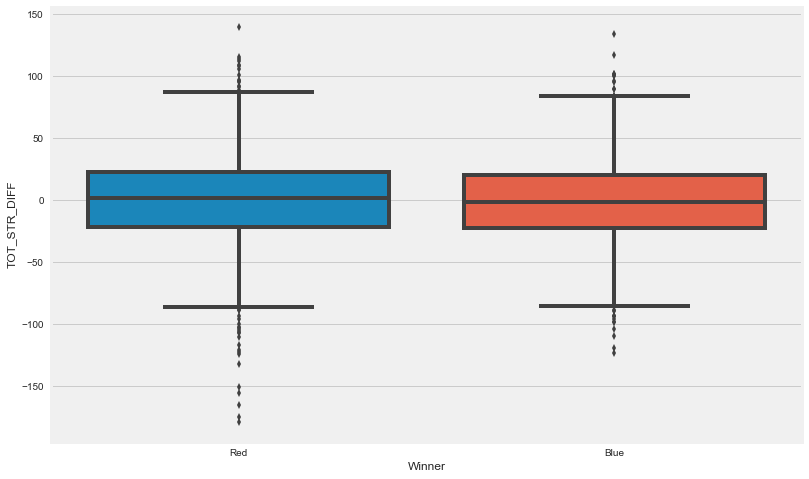

In [36]:
plt.figure(figsize=(12,8))
sns.boxplot(x='Winner', y= 'TOT_STR_DIFF', data=df);

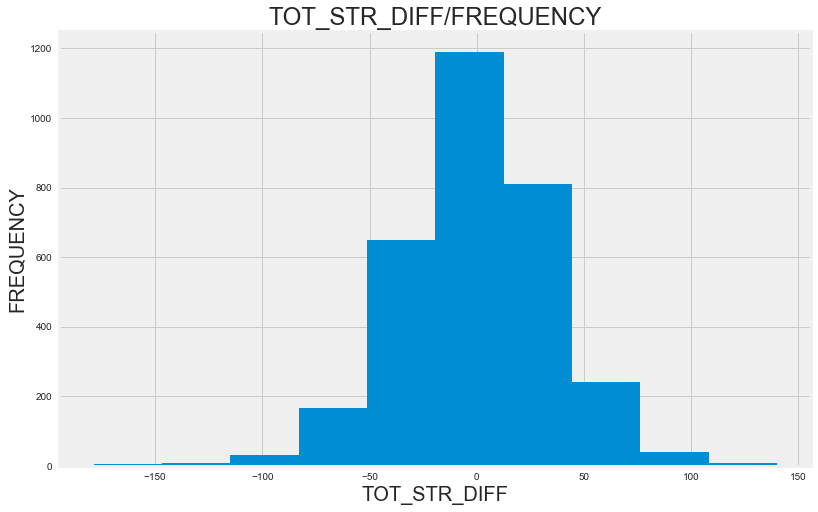

In [37]:
plt.figure(figsize=(12,8))
df['TOT_STR_DIFF'].hist()
plt.xlabel('TOT_STR_DIFF', fontsize=20)
plt.ylabel('FREQUENCY', fontsize=20)
plt.title('TOT_STR_DIFF/FREQUENCY', fontsize=24);

In [38]:
df['TOT_STR_ATT_DIFF'] = df['R_avg_TOTAL_STR_att'] \
                        - df['B_avg_TOTAL_STR_att']

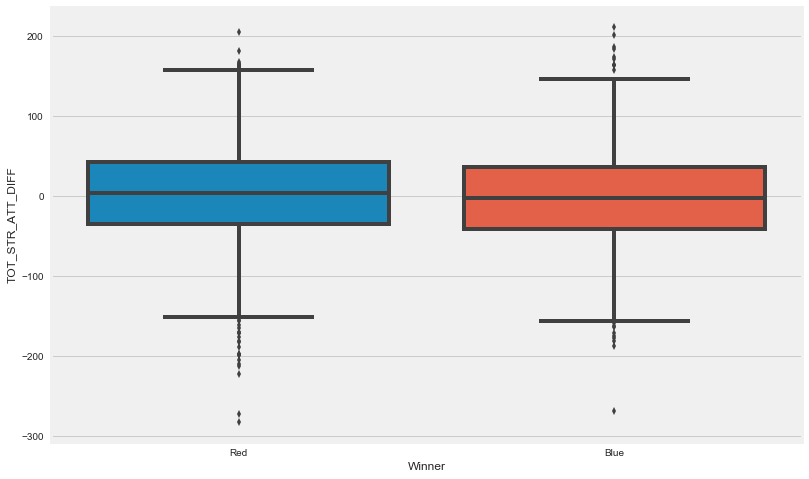

In [39]:
plt.figure(figsize=(12,8))
sns.boxplot(x='Winner', y= 'TOT_STR_ATT_DIFF', data=df);

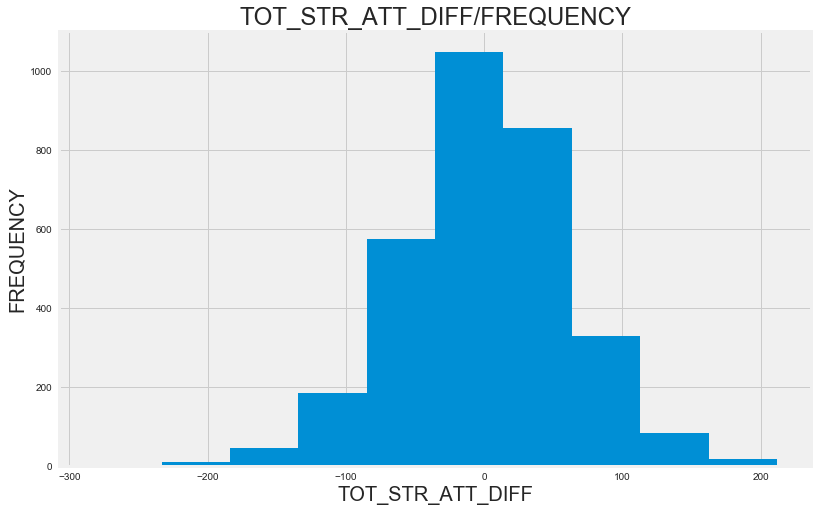

In [40]:
plt.figure(figsize=(12,8))
df['TOT_STR_ATT_DIFF'].hist()
plt.xlabel('TOT_STR_ATT_DIFF', fontsize=20)
plt.ylabel('FREQUENCY', fontsize=20)
plt.title('TOT_STR_ATT_DIFF/FREQUENCY', fontsize=24);

In [41]:
df['DIST_STRIKE_DIFF'] = df['R_avg_DISTANCE_landed'] \
                        - df['B_avg_DISTANCE_landed']

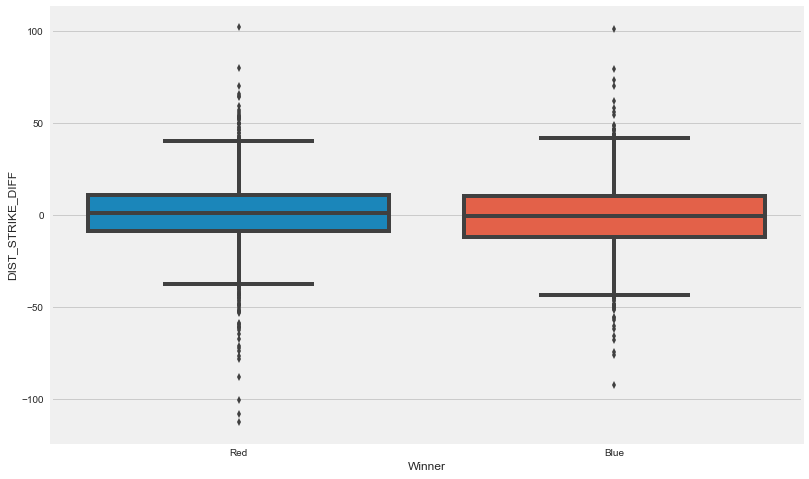

In [42]:
plt.figure(figsize=(12,8))
sns.boxplot(x='Winner', y= 'DIST_STRIKE_DIFF', data=df);

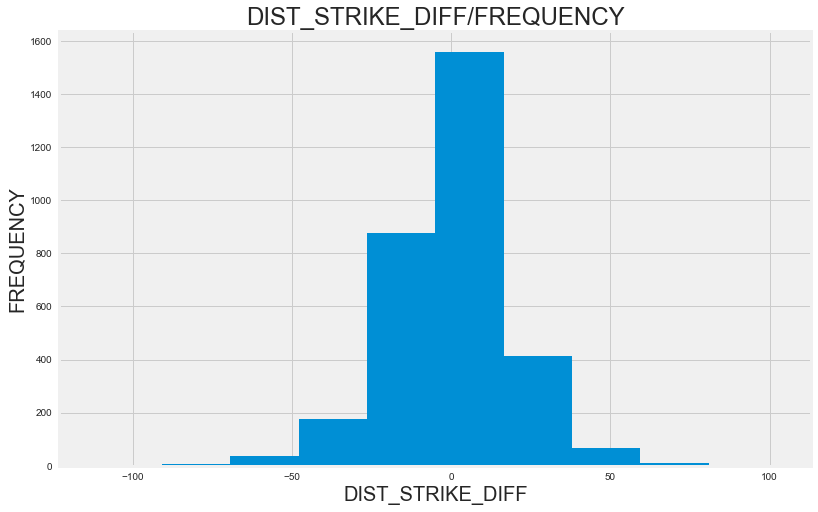

In [43]:
plt.figure(figsize=(12,8))
df['DIST_STRIKE_DIFF'].hist()
plt.xlabel('DIST_STRIKE_DIFF', fontsize=20)
plt.ylabel('FREQUENCY', fontsize=20)
plt.title('DIST_STRIKE_DIFF/FREQUENCY', fontsize=24);

In [44]:
df['DIST_STRIKE_ATT_DIFF'] = df['R_avg_DISTANCE_att'] \
                        - df['B_avg_DISTANCE_att']

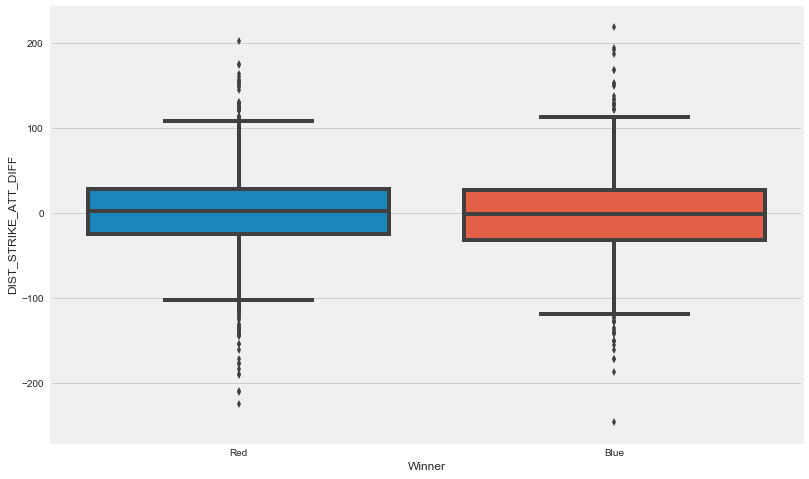

In [45]:
plt.figure(figsize=(12,8))
sns.boxplot(x='Winner', y= 'DIST_STRIKE_ATT_DIFF', data=df);

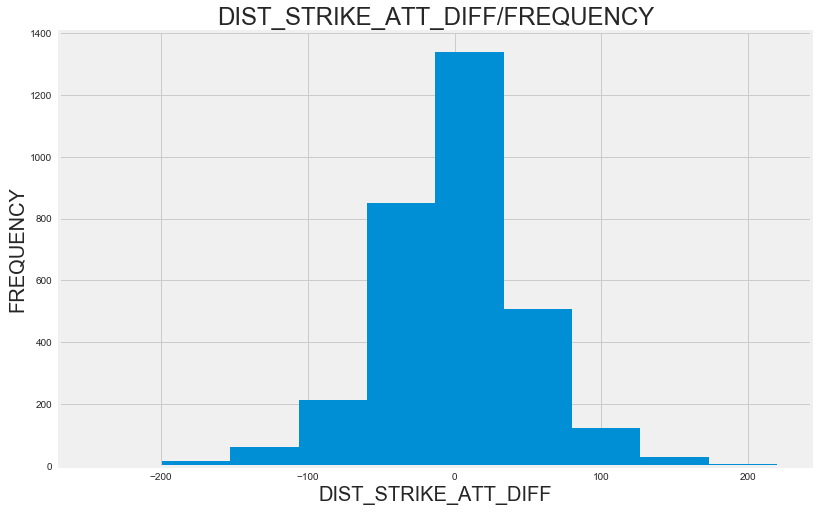

In [46]:
plt.figure(figsize=(12,8))
df['DIST_STRIKE_ATT_DIFF'].hist()
plt.xlabel('DIST_STRIKE_ATT_DIFF', fontsize=20)
plt.ylabel('FREQUENCY', fontsize=20)
plt.title('DIST_STRIKE_ATT_DIFF/FREQUENCY', fontsize=24);

In [47]:
df['PASS_DIFF'] = df['R_avg_PASS'] \
                        - df['B_avg_PASS']

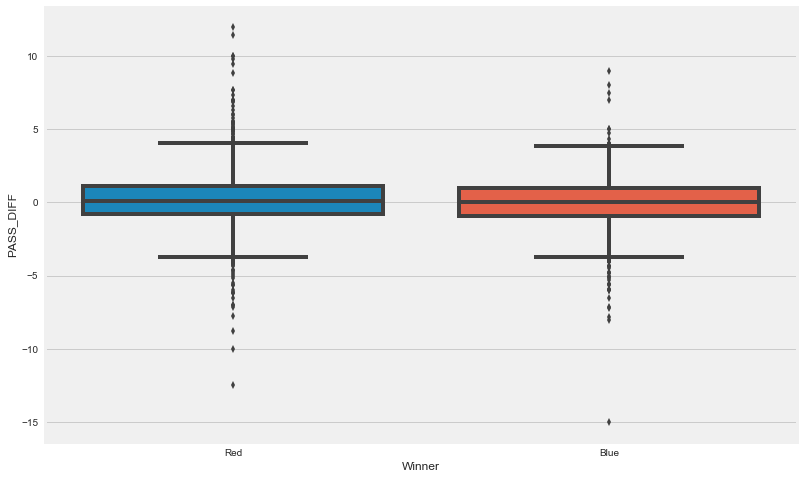

In [48]:
plt.figure(figsize=(12,8))
sns.boxplot(x='Winner', y= 'PASS_DIFF', data=df);

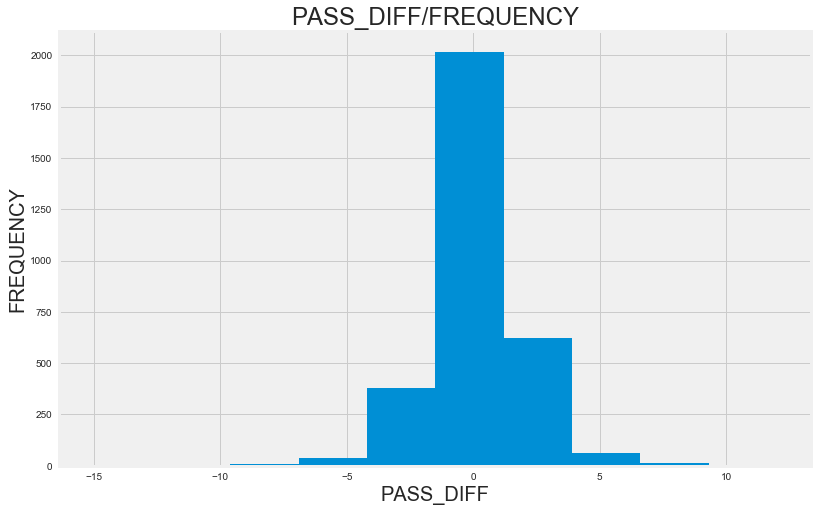

In [49]:
plt.figure(figsize=(12,8))
df['PASS_DIFF'].hist()
plt.xlabel('PASS_DIFF', fontsize=20)
plt.ylabel('FREQUENCY', fontsize=20)
plt.title('PASS_DIFF/FREQUENCY', fontsize=24);

In [50]:
df['REV_DIFF'] = df['R_avg_REV'] \
                        - df['B_avg_REV']

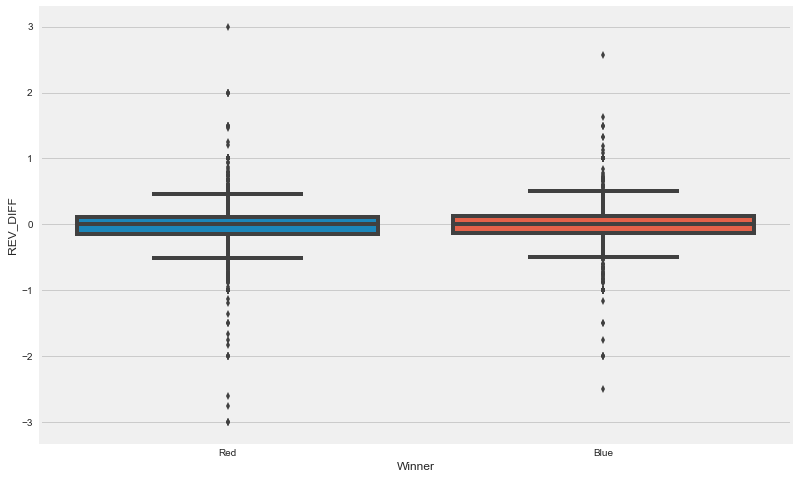

In [51]:
plt.figure(figsize=(12,8))
sns.boxplot(x='Winner', y= 'REV_DIFF', data=df);

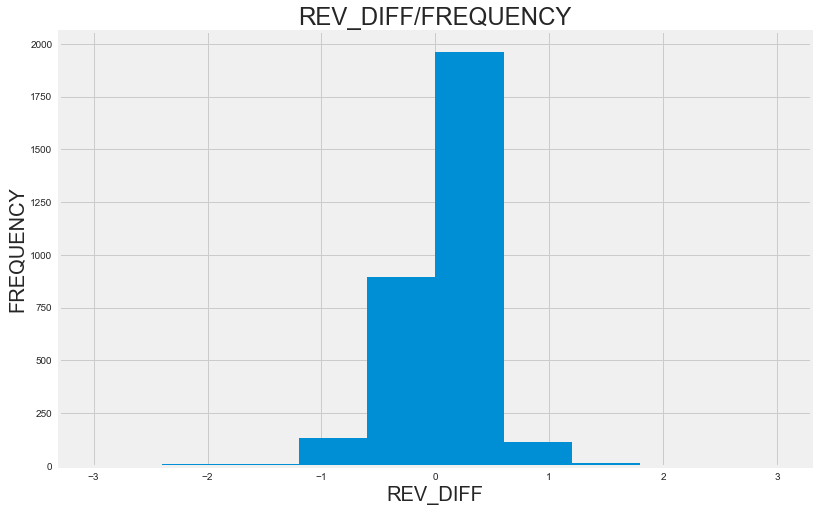

In [52]:
plt.figure(figsize=(12,8))
df['REV_DIFF'].hist()
plt.xlabel('REV_DIFF', fontsize=20)
plt.ylabel('FREQUENCY', fontsize=20)
plt.title('REV_DIFF/FREQUENCY', fontsize=24);

In [53]:
df['LEG_DIFF'] = df['R_avg_LEG_landed'] \
                        - df['B_avg_LEG_landed']

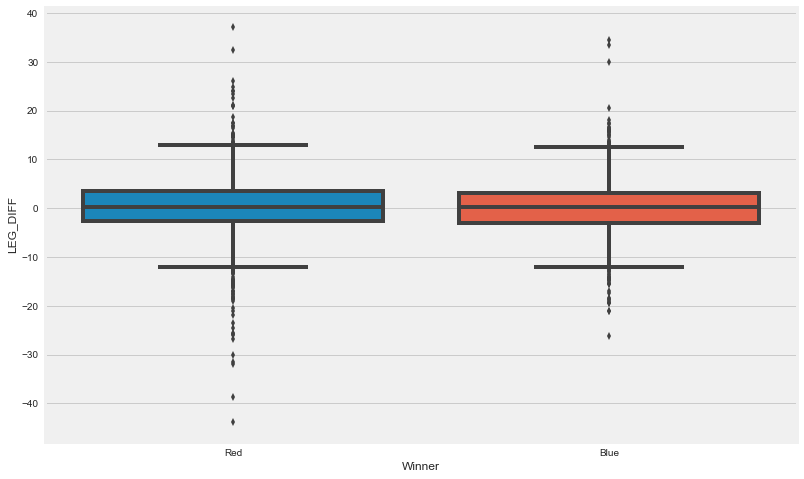

In [54]:
plt.figure(figsize=(12,8))
sns.boxplot(x='Winner', y= 'LEG_DIFF', data=df);

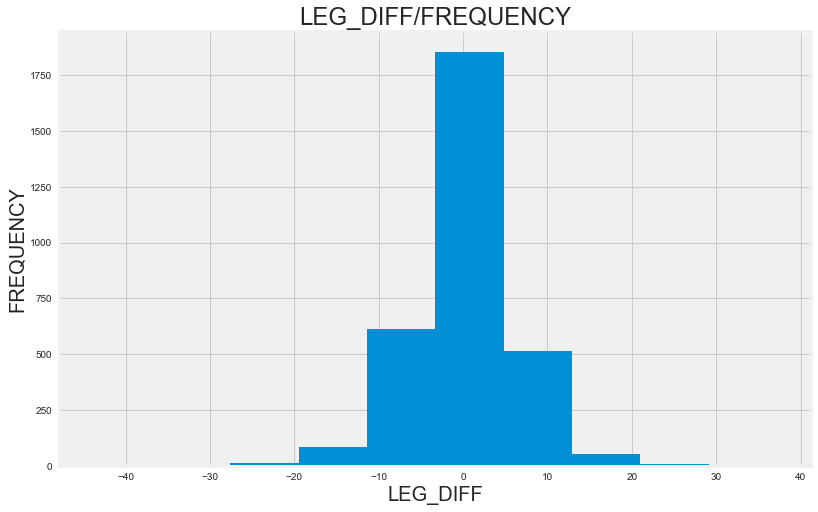

In [55]:
plt.figure(figsize=(12,8))
df['LEG_DIFF'].hist()
plt.xlabel('LEG_DIFF', fontsize=20)
plt.ylabel('FREQUENCY', fontsize=20)
plt.title('LEG_DIFF/FREQUENCY', fontsize=24);

In [56]:
df['LEG_ATT_DIFF'] = df['R_avg_LEG_att'] \
                        - df['B_avg_LEG_att']

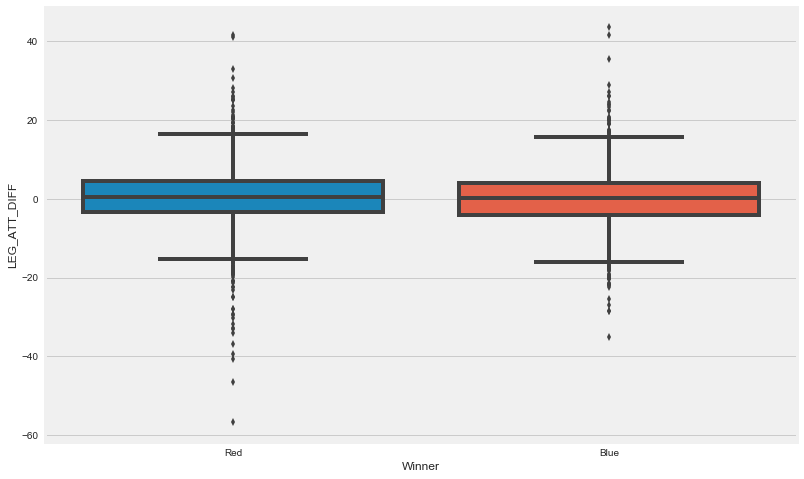

In [57]:
plt.figure(figsize=(12,8))
sns.boxplot(x='Winner', y= 'LEG_ATT_DIFF', data=df);

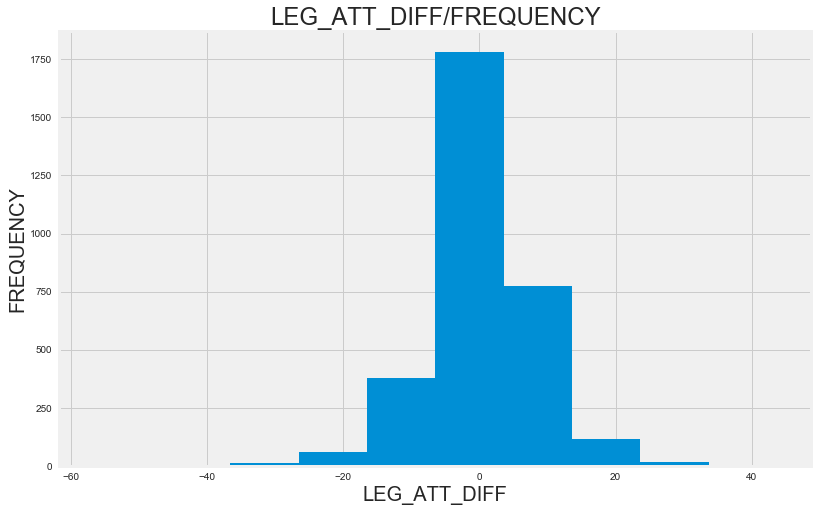

In [58]:
plt.figure(figsize=(12,8))
df['LEG_ATT_DIFF'].hist()
plt.xlabel('LEG_ATT_DIFF', fontsize=20)
plt.ylabel('FREQUENCY', fontsize=20)
plt.title('LEG_ATT_DIFF/FREQUENCY', fontsize=24);

In [59]:
df['CLINCH_DIFF'] = df['R_avg_CLINCH_landed'] \
                        - df['B_avg_CLINCH_landed']

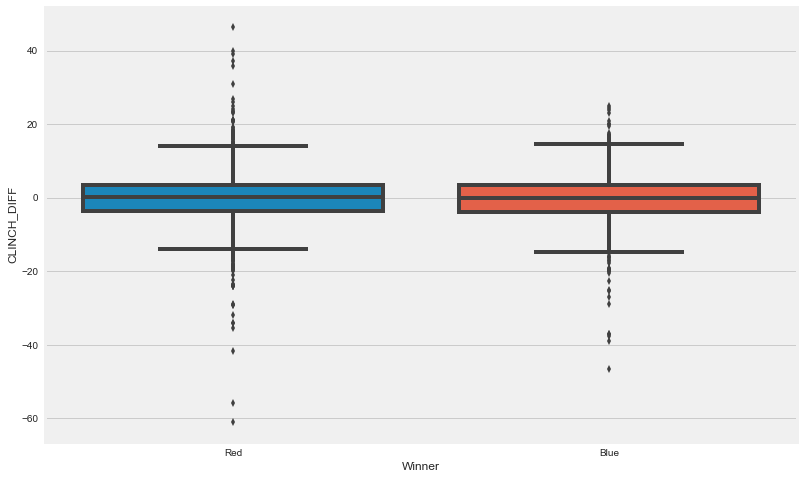

In [60]:
plt.figure(figsize=(12,8))
sns.boxplot(x='Winner', y= 'CLINCH_DIFF', data=df);

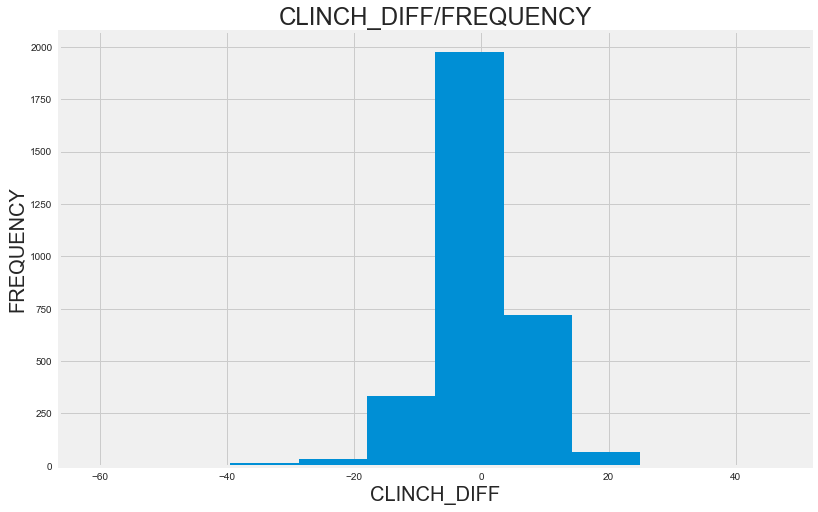

In [61]:
plt.figure(figsize=(12,8))
df['CLINCH_DIFF'].hist()
plt.xlabel('CLINCH_DIFF', fontsize=20)
plt.ylabel('FREQUENCY', fontsize=20)
plt.title('CLINCH_DIFF/FREQUENCY', fontsize=24);

In [62]:
df['CLINCH_ATT_DIFF'] = df['R_avg_CLINCH_att'] \
                        - df['B_avg_CLINCH_att']

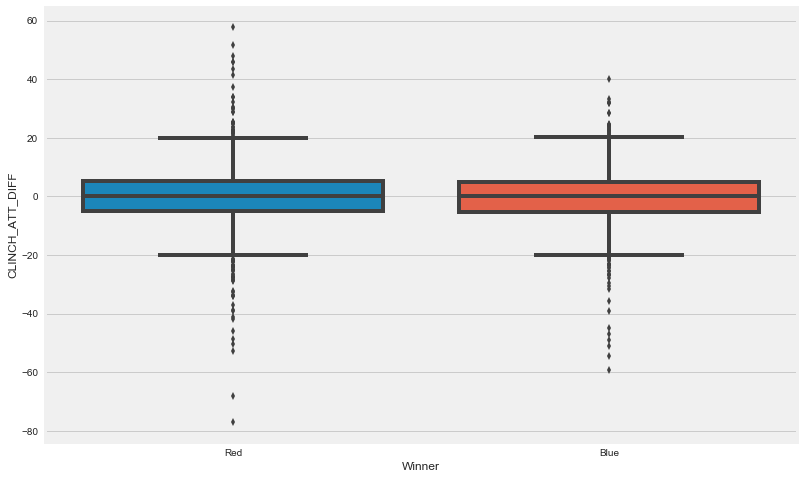

In [63]:
plt.figure(figsize=(12,8))
sns.boxplot(x='Winner', y= 'CLINCH_ATT_DIFF', data=df);

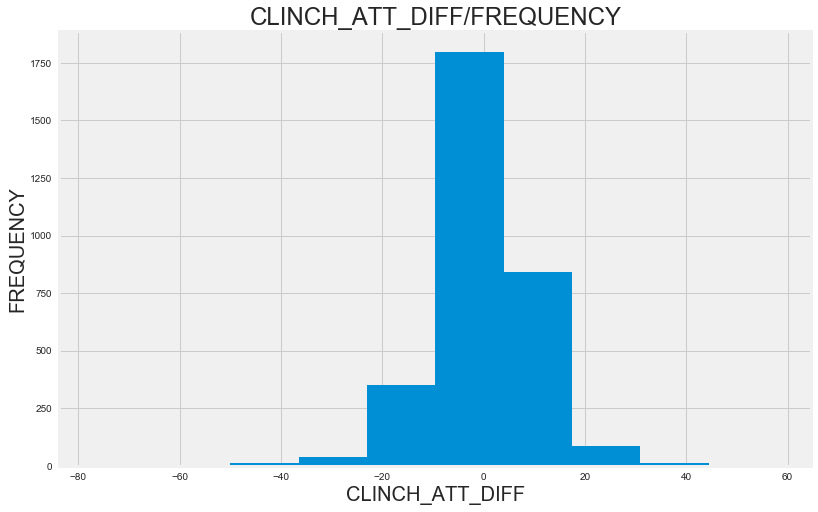

In [64]:
plt.figure(figsize=(12,8))
df['CLINCH_ATT_DIFF'].hist()
plt.xlabel('CLINCH_ATT_DIFF', fontsize=20)
plt.ylabel('FREQUENCY', fontsize=20)
plt.title('CLINCH_ATT_DIFF/FREQUENCY', fontsize=24);

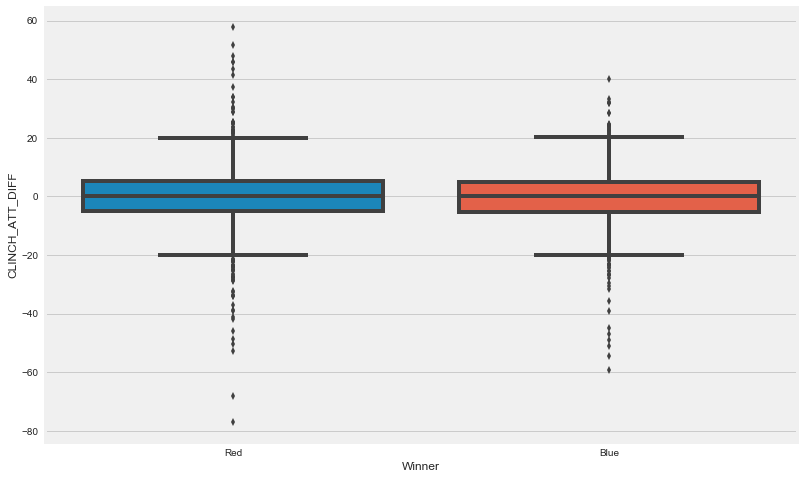

In [65]:
plt.figure(figsize=(12,8))
sns.boxplot(x='Winner', y= 'CLINCH_ATT_DIFF', data=df);

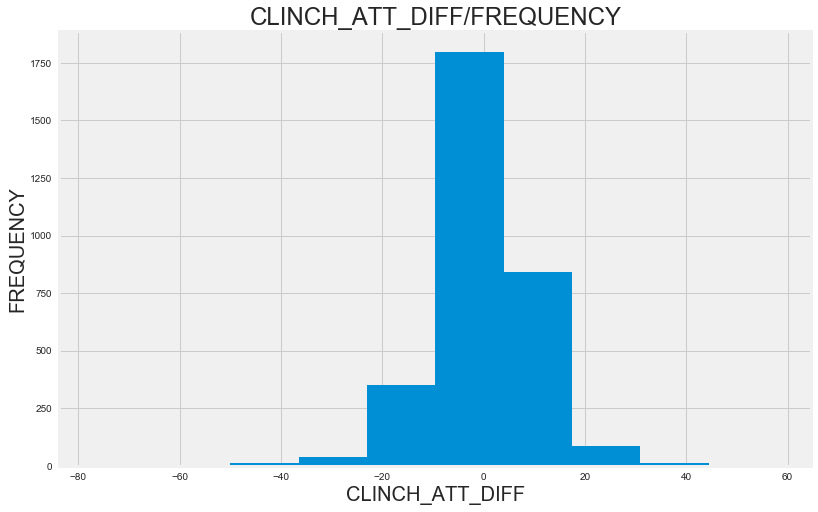

In [66]:
plt.figure(figsize=(12,8))
df['CLINCH_ATT_DIFF'].hist()
plt.xlabel('CLINCH_ATT_DIFF', fontsize=20)
plt.ylabel('FREQUENCY', fontsize=20)
plt.title('CLINCH_ATT_DIFF/FREQUENCY', fontsize=24);

In [67]:
df['BODY_STR_DIFF'] = df['R_avg_BODY_landed'] \
                        - df['B_avg_BODY_landed']

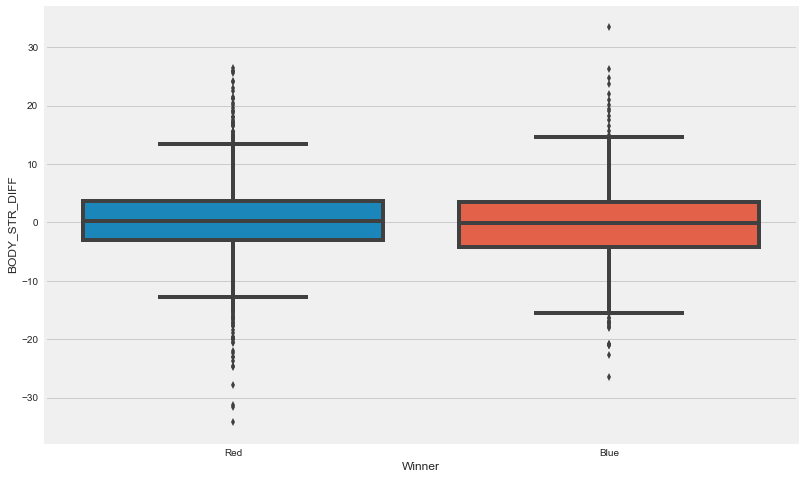

In [68]:
plt.figure(figsize=(12,8))
sns.boxplot(x='Winner', y= 'BODY_STR_DIFF', data=df);

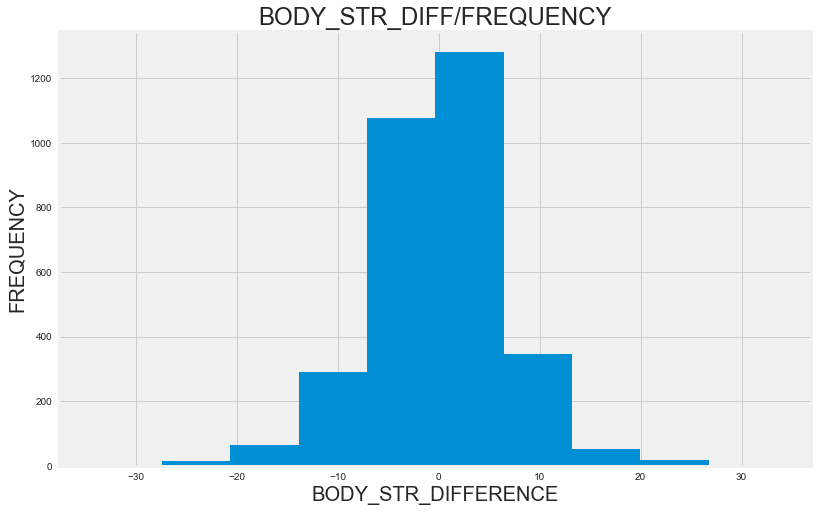

In [69]:
plt.figure(figsize=(12,8))
df['BODY_STR_DIFF'].hist()
plt.xlabel('BODY_STR_DIFFERENCE', fontsize=20)
plt.ylabel('FREQUENCY', fontsize=20)
plt.title('BODY_STR_DIFF/FREQUENCY', fontsize=24);

In [70]:
df['BODY_STR_ATT_DIFF'] = df['R_avg_BODY_att'] \
                        - df['B_avg_BODY_att']

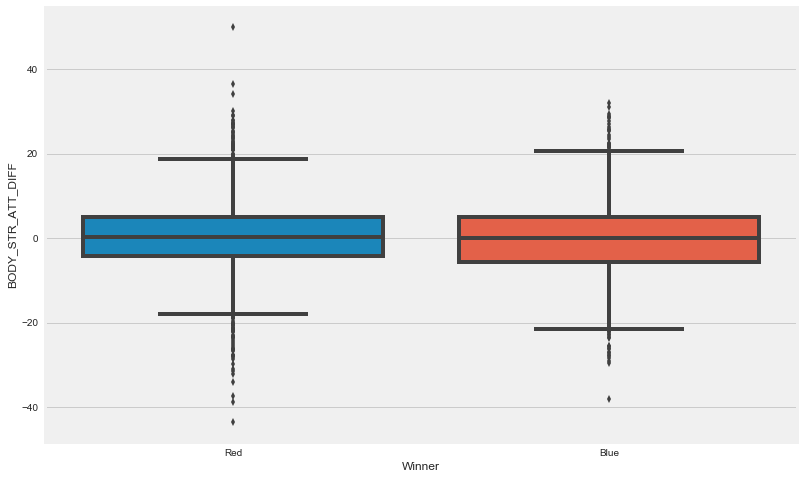

In [71]:
plt.figure(figsize=(12,8))
sns.boxplot(x='Winner', y= 'BODY_STR_ATT_DIFF', data=df);

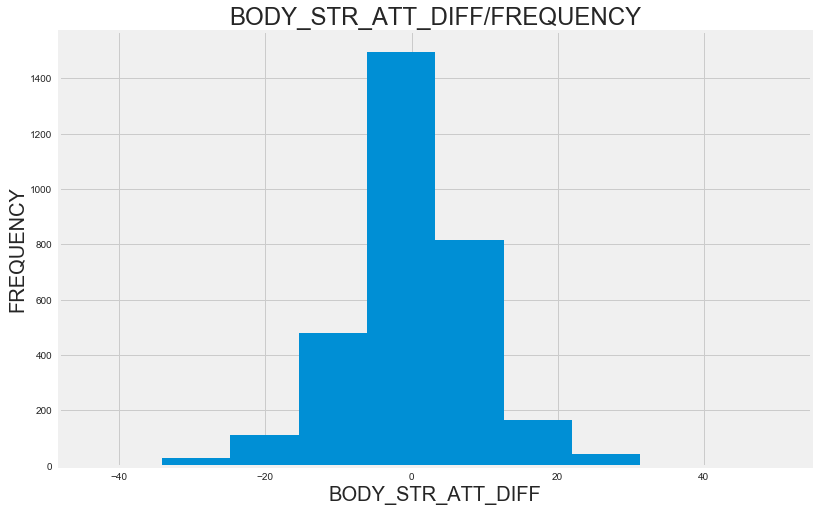

In [72]:
plt.figure(figsize=(12,8))
df['BODY_STR_ATT_DIFF'].hist()
plt.xlabel('BODY_STR_ATT_DIFF', fontsize=20)
plt.ylabel('FREQUENCY', fontsize=20)
plt.title('BODY_STR_ATT_DIFF/FREQUENCY', fontsize=24);

In [73]:
df['HEAD_STR_DIFF'] = df['R_avg_HEAD_landed'] \
                        - df['B_avg_HEAD_landed']

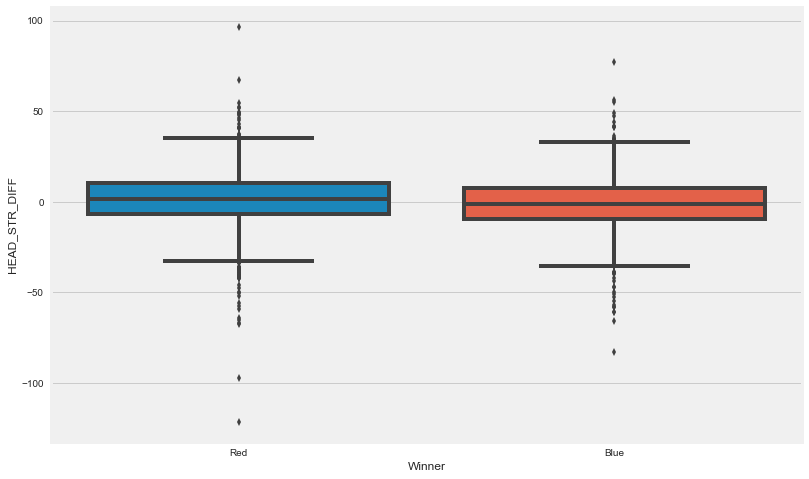

In [74]:
plt.figure(figsize=(12,8))
sns.boxplot(x='Winner', y= 'HEAD_STR_DIFF', data=df);

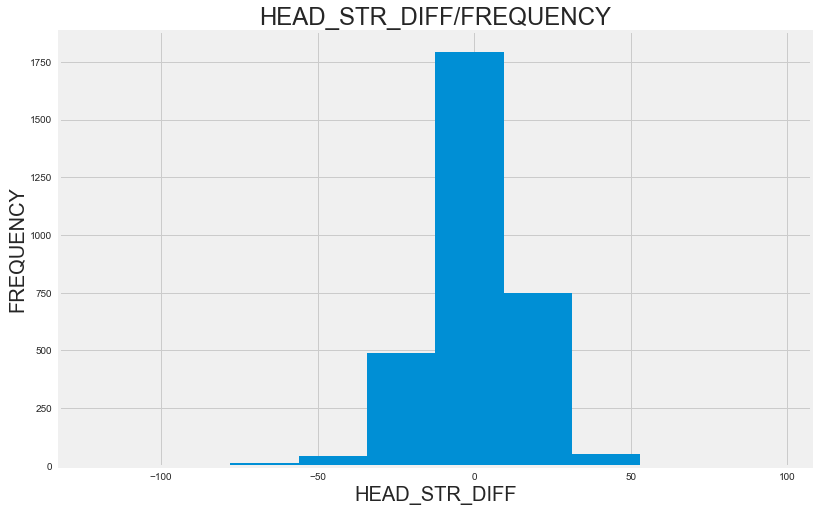

In [75]:
plt.figure(figsize=(12,8))
df['HEAD_STR_DIFF'].hist()
plt.xlabel('HEAD_STR_DIFF', fontsize=20)
plt.ylabel('FREQUENCY', fontsize=20)
plt.title('HEAD_STR_DIFF/FREQUENCY', fontsize=24);

In [76]:
df['HEAD_STR_ATT_DIFF'] = df['R_avg_HEAD_att'] \
                        - df['B_avg_HEAD_att']

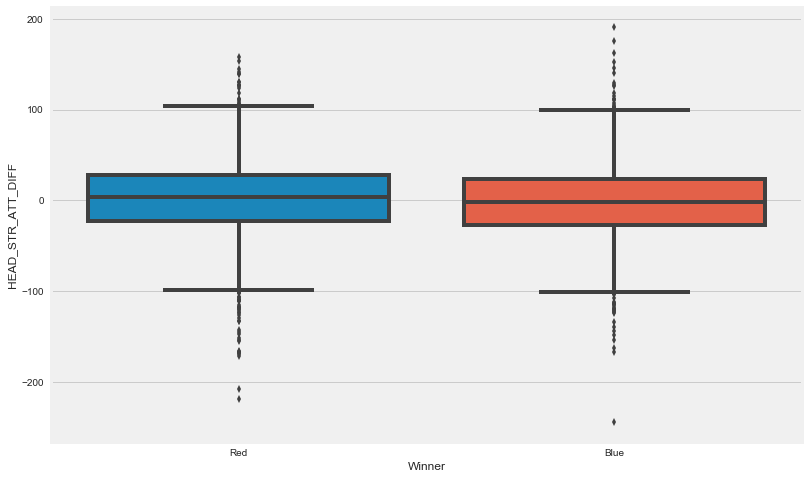

In [77]:
plt.figure(figsize=(12,8))
sns.boxplot(x='Winner', y= 'HEAD_STR_ATT_DIFF', data=df);

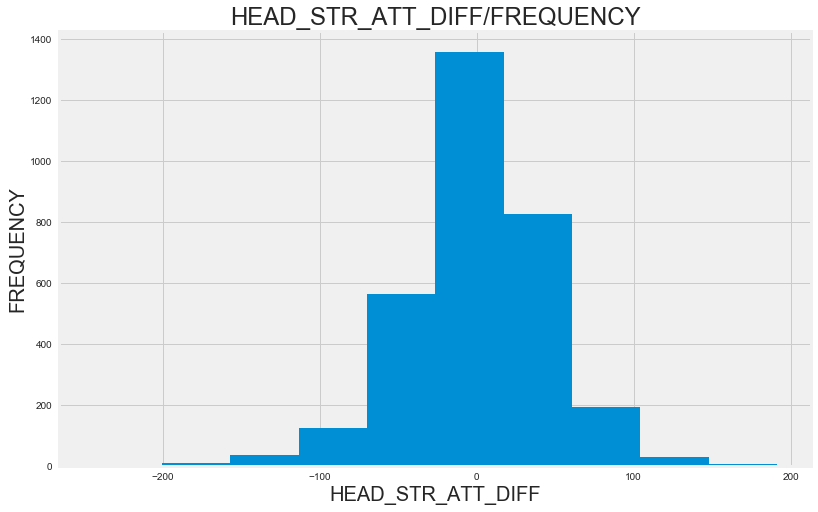

In [78]:
plt.figure(figsize=(12,8))
df['HEAD_STR_ATT_DIFF'].hist()
plt.xlabel('HEAD_STR_ATT_DIFF', fontsize=20)
plt.ylabel('FREQUENCY', fontsize=20)
plt.title('HEAD_STR_ATT_DIFF/FREQUENCY', fontsize=24);

In [79]:
df['GROUND_STR_DIFF'] = df['R_avg_GROUND_landed'] \
                        - df['B_avg_GROUND_landed']

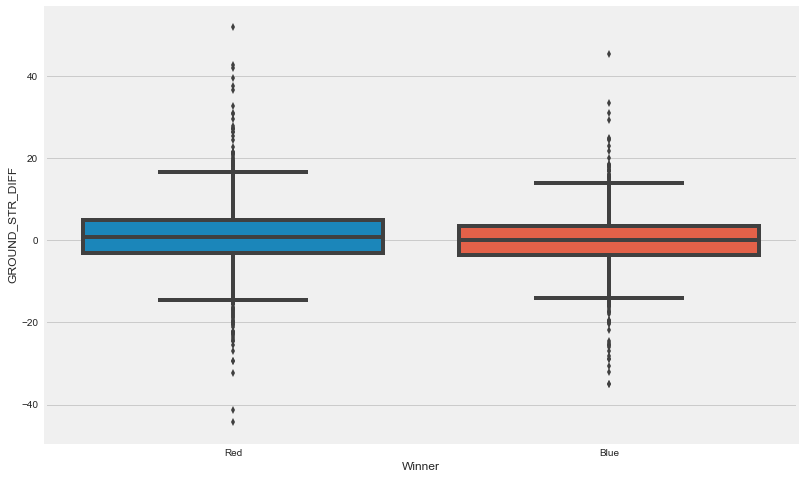

In [80]:
plt.figure(figsize=(12,8))
sns.boxplot(x='Winner', y= 'GROUND_STR_DIFF', data=df);

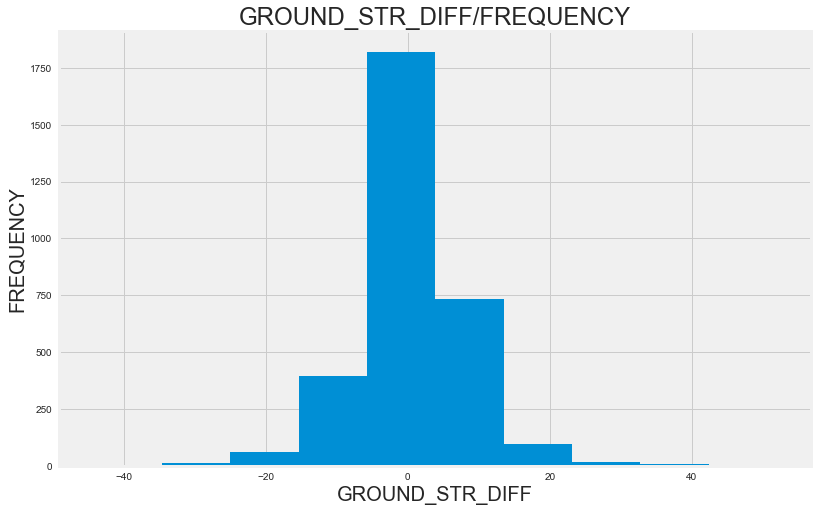

In [81]:
plt.figure(figsize=(12,8))
df['GROUND_STR_DIFF'].hist()
plt.xlabel('GROUND_STR_DIFF', fontsize=20)
plt.ylabel('FREQUENCY', fontsize=20)
plt.title('GROUND_STR_DIFF/FREQUENCY', fontsize=24);

In [82]:
df['GROUND_STR_ATT_DIFF'] = df['R_avg_GROUND_att'] \
                        - df['B_avg_GROUND_att']

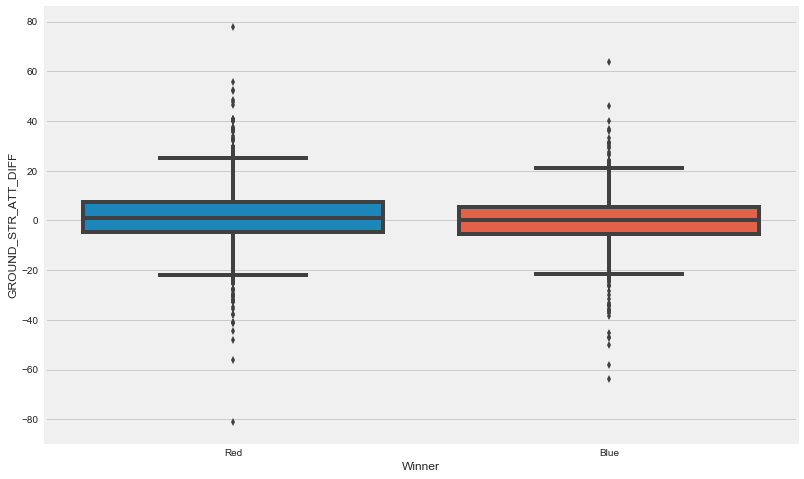

In [83]:
plt.figure(figsize=(12,8))
sns.boxplot(x='Winner', y= 'GROUND_STR_ATT_DIFF', data=df);

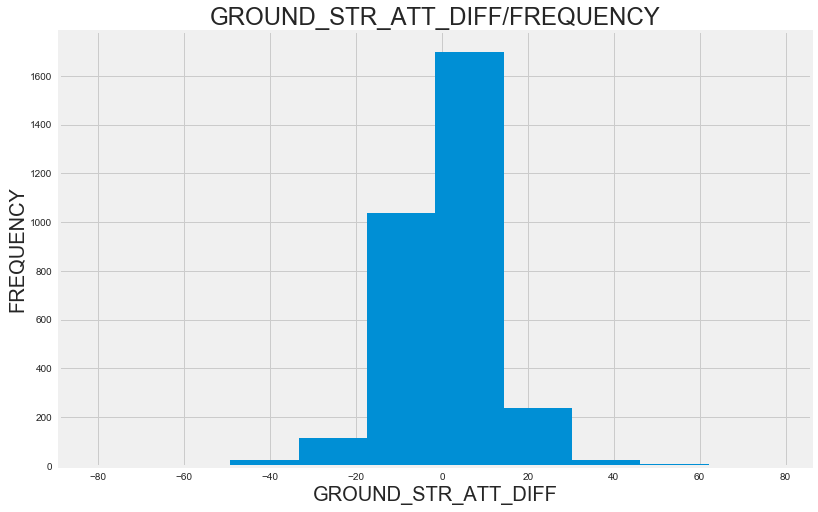

In [84]:
plt.figure(figsize=(12,8))
df['GROUND_STR_ATT_DIFF'].hist()
plt.xlabel('GROUND_STR_ATT_DIFF', fontsize=20)
plt.ylabel('FREQUENCY', fontsize=20)
plt.title('GROUND_STR_ATT_DIFF/FREQUENCY', fontsize=24);

In [85]:
df['SIG_STR_DIFF'] = df['R_avg_SIG_STR_landed'] \
                        - df['B_avg_SIG_STR_landed']

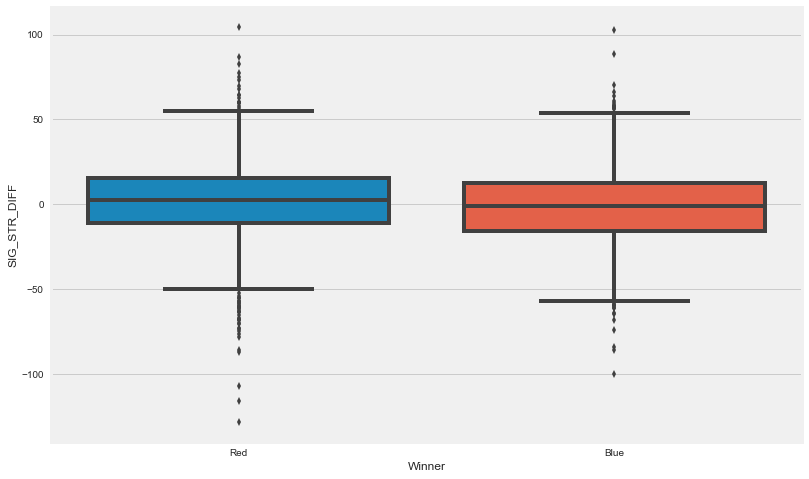

In [86]:
plt.figure(figsize=(12,8))
sns.boxplot(x='Winner', y= 'SIG_STR_DIFF', data=df);

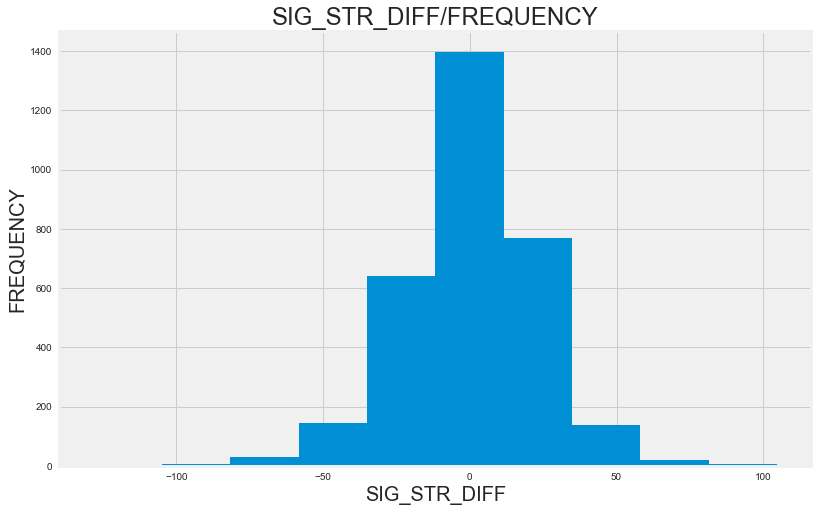

In [87]:
plt.figure(figsize=(12,8))
df['SIG_STR_DIFF'].hist()
plt.xlabel('SIG_STR_DIFF', fontsize=20)
plt.ylabel('FREQUENCY', fontsize=20)
plt.title('SIG_STR_DIFF/FREQUENCY', fontsize=24);

In [88]:
df['SIG_STR_ATT_DIFF'] = df['R_avg_SIG_STR_att'] \
                        - df['B_avg_SIG_STR_att']

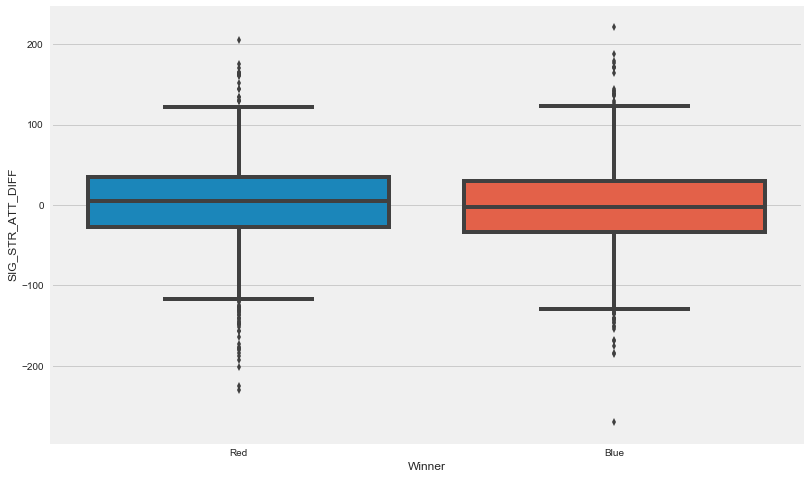

In [89]:
plt.figure(figsize=(12,8))
sns.boxplot(x='Winner', y= 'SIG_STR_ATT_DIFF', data=df);

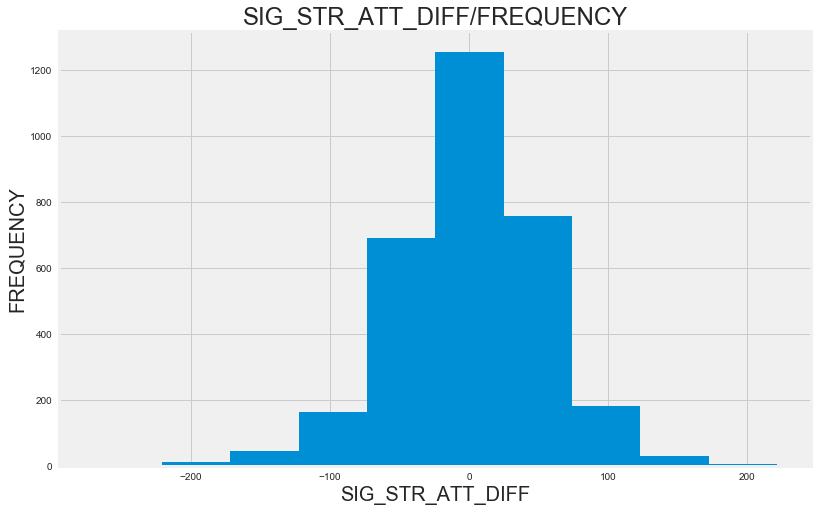

In [90]:
plt.figure(figsize=(12,8))
df['SIG_STR_ATT_DIFF'].hist()
plt.xlabel('SIG_STR_ATT_DIFF', fontsize=20)
plt.ylabel('FREQUENCY', fontsize=20)
plt.title('SIG_STR_ATT_DIFF/FREQUENCY', fontsize=24);

In [91]:
df['TAKEDOWN_DIFF'] = df['R_avg_TD_landed'] \
                        - df['B_avg_TD_landed']

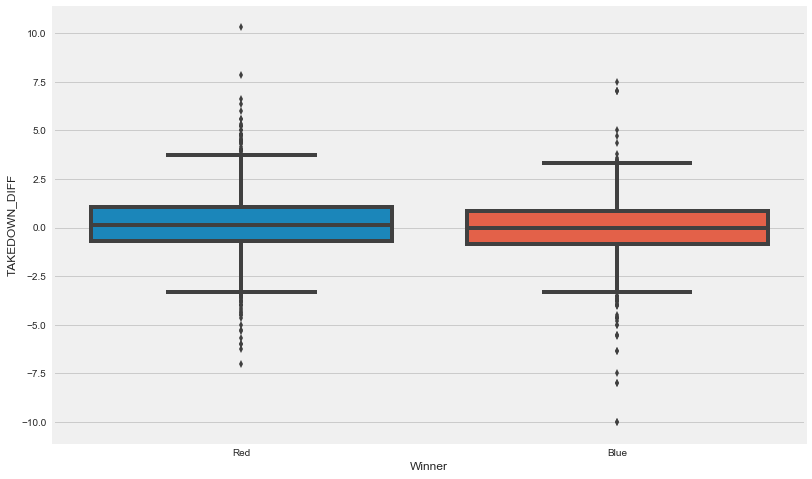

In [92]:
plt.figure(figsize=(12,8))
sns.boxplot(x='Winner', y= 'TAKEDOWN_DIFF', data=df);

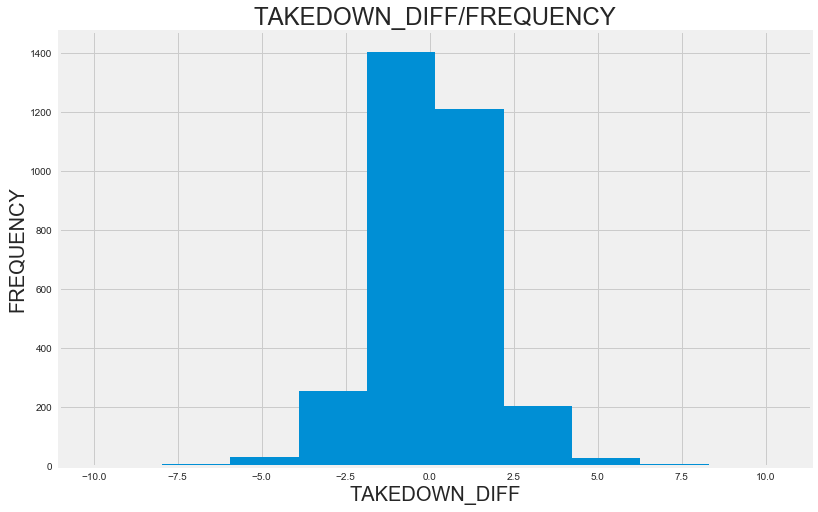

In [93]:
plt.figure(figsize=(12,8))
df['TAKEDOWN_DIFF'].hist()
plt.xlabel('TAKEDOWN_DIFF', fontsize=20)
plt.ylabel('FREQUENCY', fontsize=20)
plt.title('TAKEDOWN_DIFF/FREQUENCY', fontsize=24);

In [94]:
df['TAKEDOWN_ATT_DIFF'] = df['R_avg_TD_att'] \
                        - df['B_avg_TD_att']

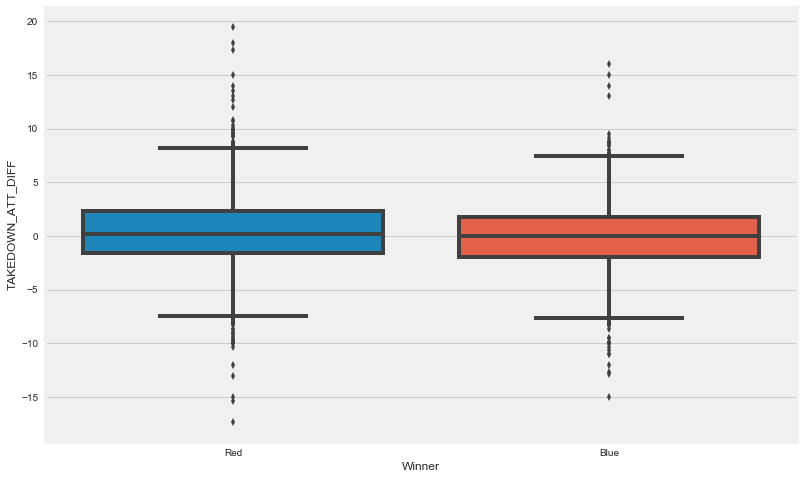

In [95]:
plt.figure(figsize=(12,8))
sns.boxplot(x='Winner', y= 'TAKEDOWN_ATT_DIFF', data=df);

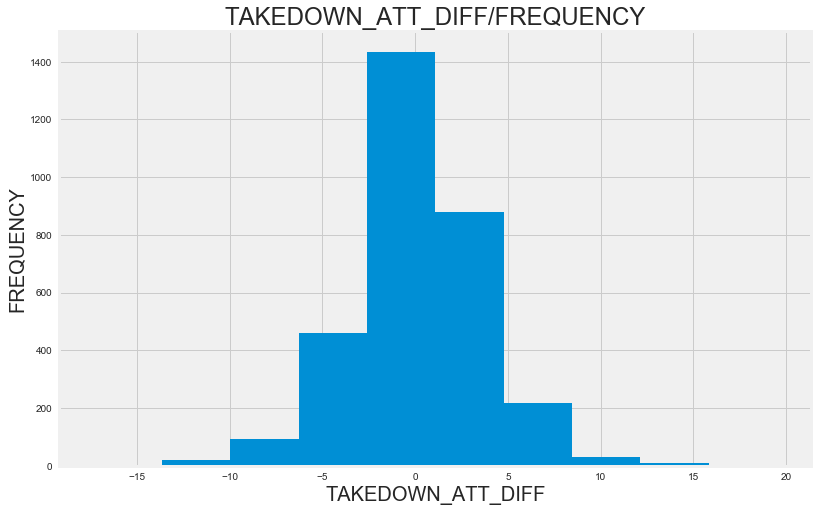

In [96]:
plt.figure(figsize=(12,8))
df['TAKEDOWN_ATT_DIFF'].hist()
plt.xlabel('TAKEDOWN_ATT_DIFF', fontsize=20)
plt.ylabel('FREQUENCY', fontsize=20)
plt.title('TAKEDOWN_ATT_DIFF/FREQUENCY', fontsize=24);

In [97]:
df['SUB_ATT_DIFF'] = df['R_avg_SUB_ATT'] \
                        - df['B_avg_SUB_ATT']

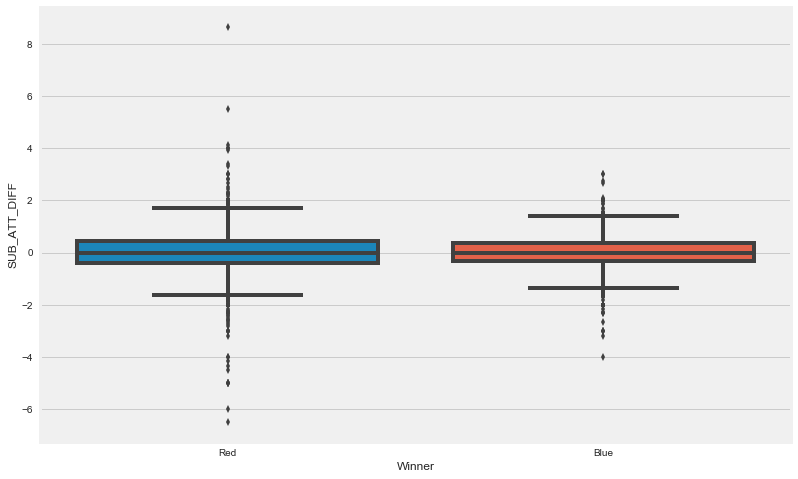

In [98]:
plt.figure(figsize=(12,8))
sns.boxplot(x='Winner', y= 'SUB_ATT_DIFF', data=df);

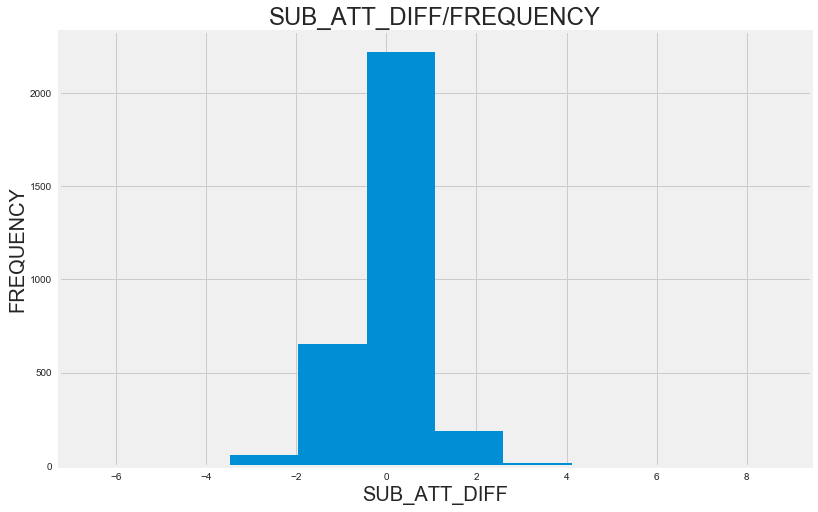

In [99]:
plt.figure(figsize=(12,8))
df['SUB_ATT_DIFF'].hist()
plt.xlabel('SUB_ATT_DIFF', fontsize=20)
plt.ylabel('FREQUENCY', fontsize=20)
plt.title('SUB_ATT_DIFF/FREQUENCY', fontsize=24);

In [100]:
df['SECONDS_FOUGHT_DIFF'] = df['R_total_time_fought(seconds)'] \
                        - df['B_total_time_fought(seconds)']

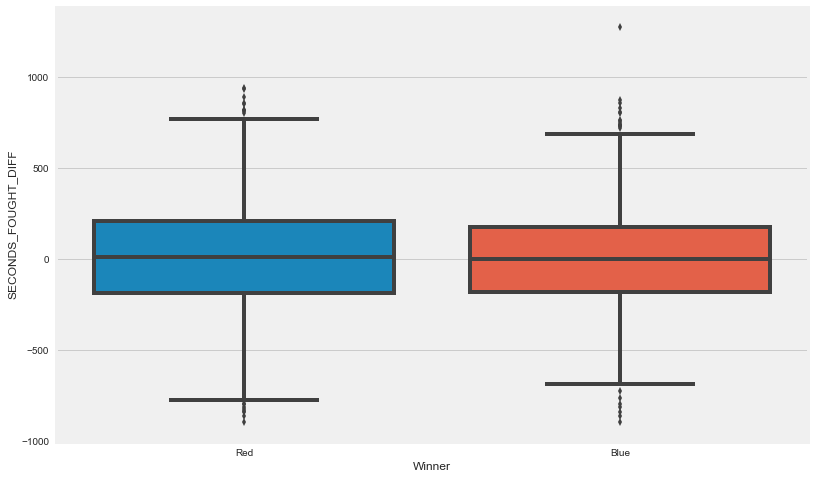

In [101]:
plt.figure(figsize=(12,8))
sns.boxplot(x='Winner', y= 'SECONDS_FOUGHT_DIFF', data=df);

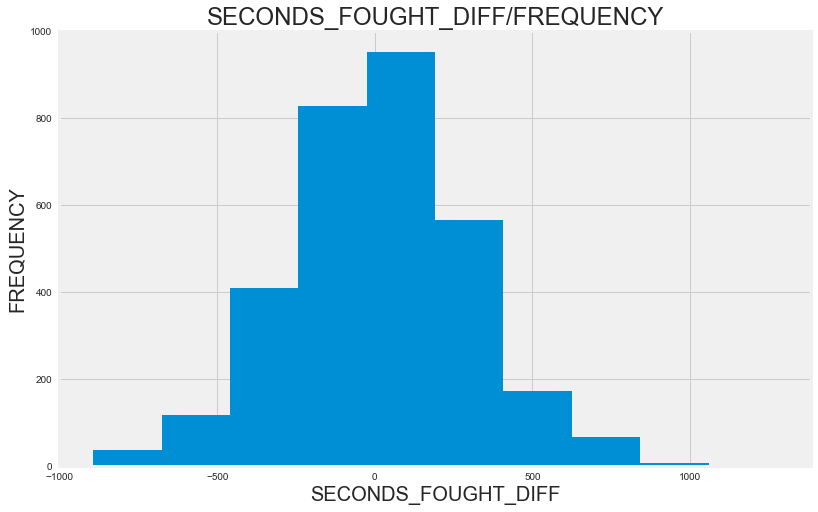

In [102]:
plt.figure(figsize=(12,8))
df['SECONDS_FOUGHT_DIFF'].hist()
plt.xlabel('SECONDS_FOUGHT_DIFF', fontsize=20)
plt.ylabel('FREQUENCY', fontsize=20)
plt.title('SECONDS_FOUGHT_DIFF/FREQUENCY', fontsize=24);

In [103]:
df['TOT_ROUND_FOUGHT_DIFF'] = df['R_total_rounds_fought'] \
                        - df['B_total_rounds_fought']

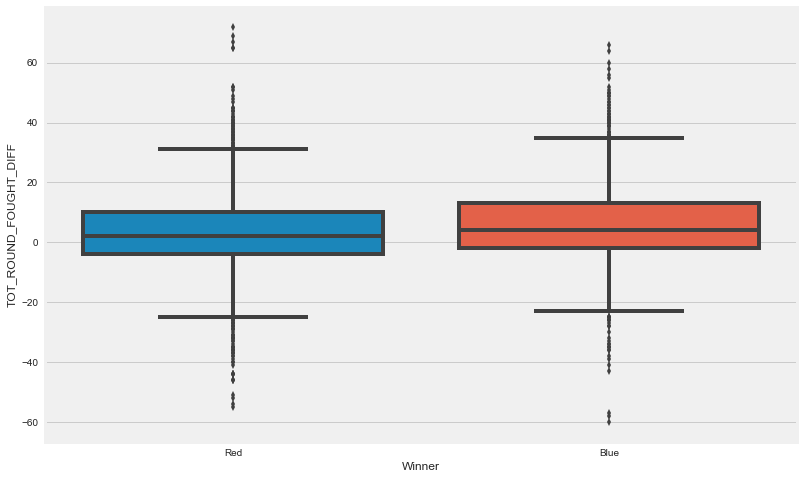

In [104]:
plt.figure(figsize=(12,8))
sns.boxplot(x='Winner', y= 'TOT_ROUND_FOUGHT_DIFF', data=df);

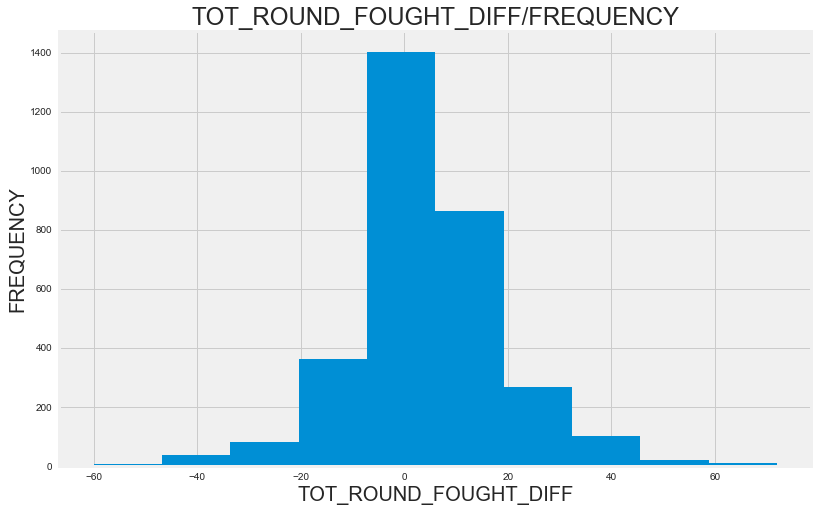

In [105]:
plt.figure(figsize=(12,8))
df['TOT_ROUND_FOUGHT_DIFF'].hist()
plt.xlabel('TOT_ROUND_FOUGHT_DIFF', fontsize=20)
plt.ylabel('FREQUENCY', fontsize=20)
plt.title('TOT_ROUND_FOUGHT_DIFF/FREQUENCY', fontsize=24);

In [106]:
df['LONG_WIN_STREAK'] = df['R_longest_win_streak'] \
                        - df['B_longest_win_streak']

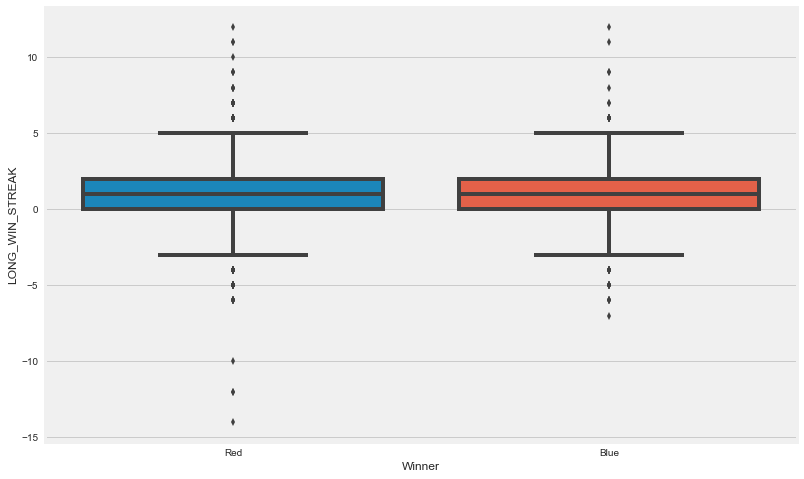

In [107]:
plt.figure(figsize=(12,8))
sns.boxplot(x='Winner', y= 'LONG_WIN_STREAK', data=df);

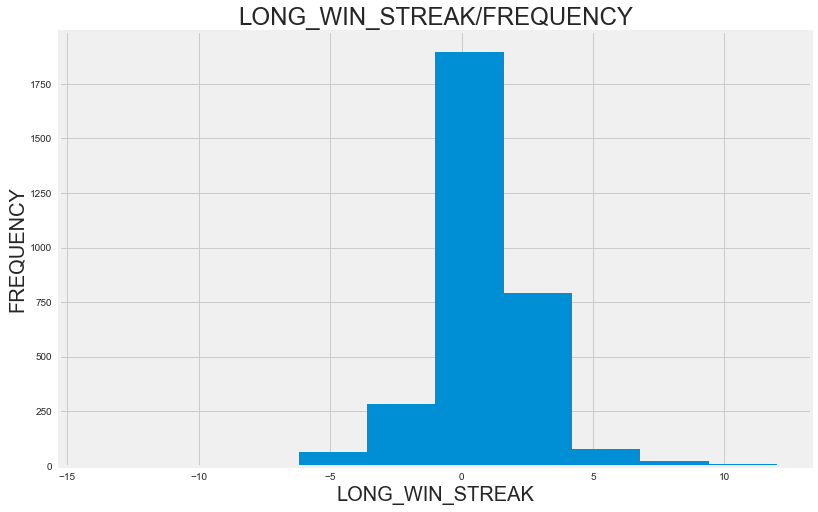

In [108]:
plt.figure(figsize=(12,8))
df['LONG_WIN_STREAK'].hist()
plt.xlabel('LONG_WIN_STREAK', fontsize=20)
plt.ylabel('FREQUENCY', fontsize=20)
plt.title('LONG_WIN_STREAK/FREQUENCY', fontsize=24);

In [109]:
df['LOSE_STREAK'] = df['R_current_lose_streak'] \
                        - df['B_current_lose_streak']

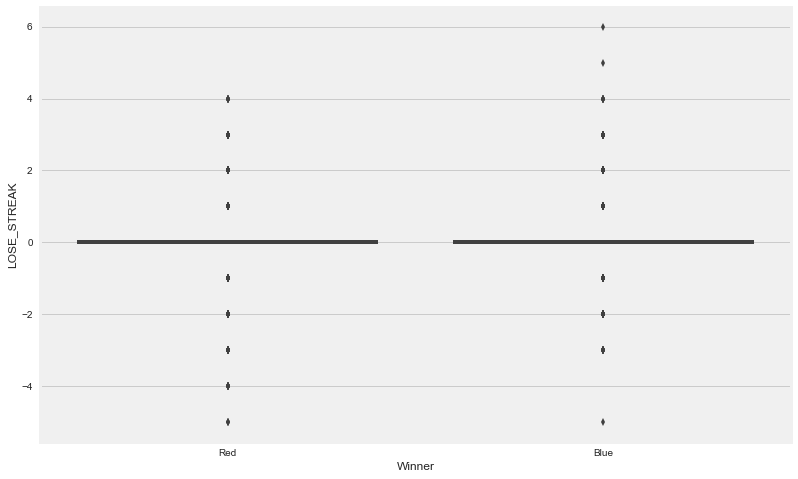

In [110]:
plt.figure(figsize=(12,8))
sns.boxplot(x='Winner', y= 'LOSE_STREAK', data=df);

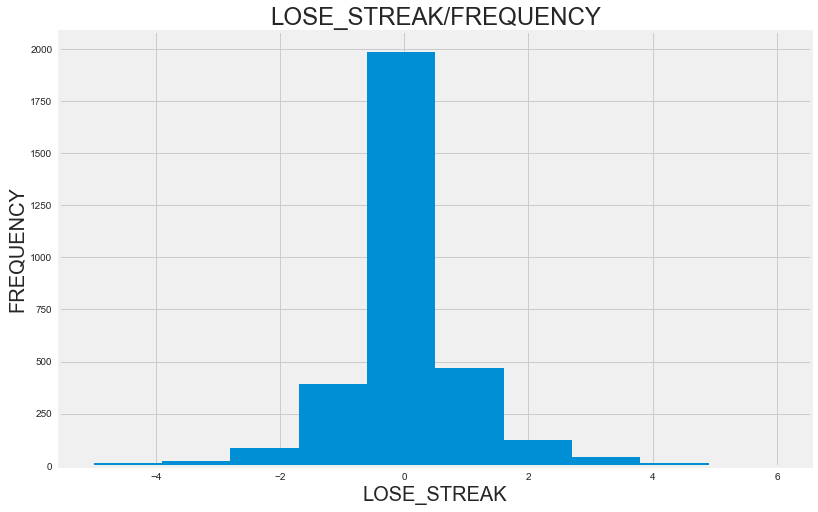

In [111]:
plt.figure(figsize=(12,8))
df['LOSE_STREAK'].hist()
plt.xlabel('LOSE_STREAK', fontsize=20)
plt.ylabel('FREQUENCY', fontsize=20)
plt.title('LOSE_STREAK/FREQUENCY', fontsize=24);

In [112]:
df['WIN_STREAK'] = df['R_current_win_streak'] \
                        - df['B_current_win_streak']

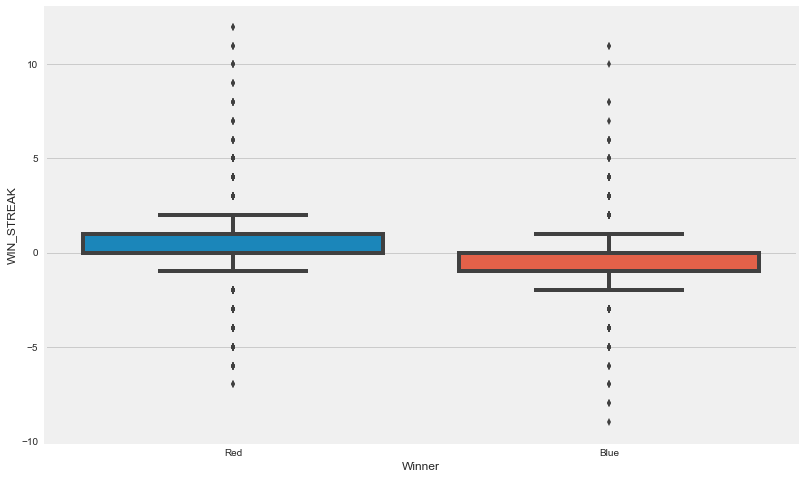

In [113]:
plt.figure(figsize=(12,8))
sns.boxplot(x='Winner', y= 'WIN_STREAK', data=df);

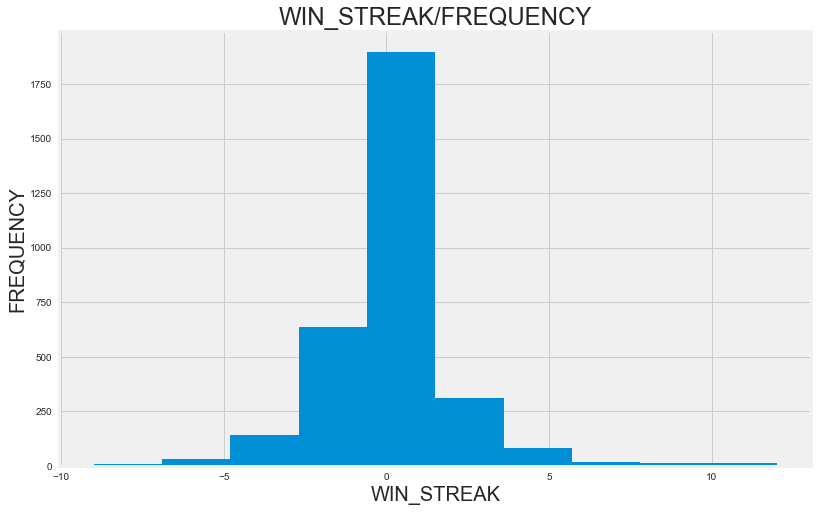

In [114]:
plt.figure(figsize=(12,8))
df['WIN_STREAK'].hist()
plt.xlabel('WIN_STREAK', fontsize=20)
plt.ylabel('FREQUENCY', fontsize=20)
plt.title('WIN_STREAK/FREQUENCY', fontsize=24);

In [115]:
df['TOT_LOSSES_DIFF'] = df['R_losses'] \
                        - df['B_losses']

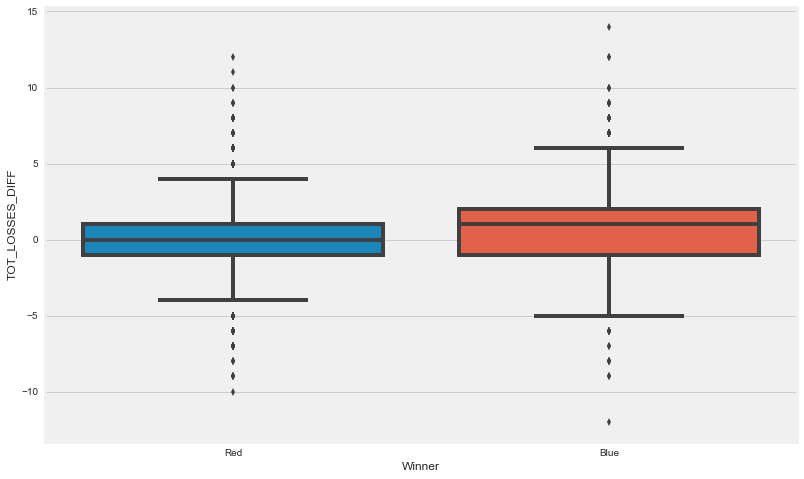

In [116]:
plt.figure(figsize=(12,8))
sns.boxplot(x='Winner', y= 'TOT_LOSSES_DIFF', data=df);

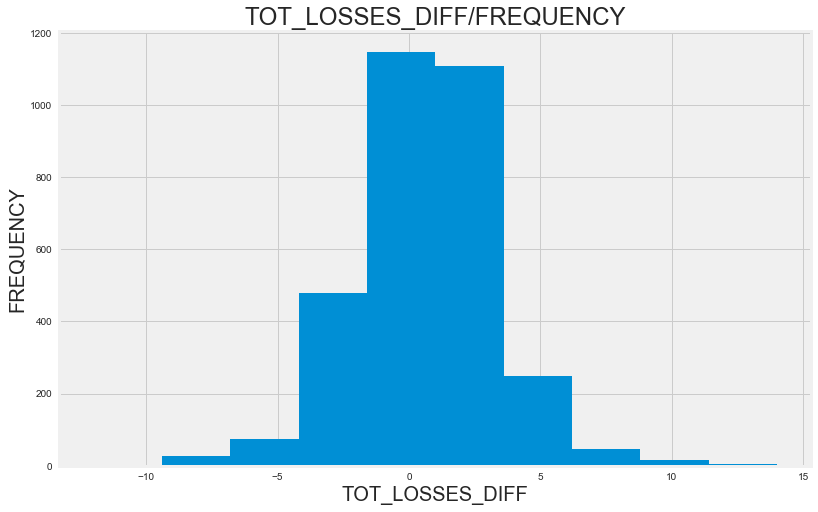

In [117]:
plt.figure(figsize=(12,8))
df['TOT_LOSSES_DIFF'].hist()
plt.xlabel('TOT_LOSSES_DIFF', fontsize=20)
plt.ylabel('FREQUENCY', fontsize=20)
plt.title('TOT_LOSSES_DIFF/FREQUENCY', fontsize=24);

# Random Forest Feature Importances

At this point I'm going to check again Random Forest for features importance including this time our new columns.

In [118]:
X = df.drop('Winner', axis=1)
y = df['Winner']

In [119]:
X = X.select_dtypes(exclude=['object'])
list(X.dtypes)

[dtype('bool'),
 dtype('int64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64')

In [120]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [121]:
# Create decision tree classifer object
clf = RandomForestClassifier(random_state=0, n_jobs=-1)

# Train model
model = clf.fit(X_train, y_train)

In [122]:
feats = {} # a dict to hold feature_name: feature_importance
for feature, importance in zip(X.columns, model.feature_importances_):
    feats[feature] = importance #add the name/value pair 

importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Gini-importance'})
importances.sort_values(by='Gini-importance',ascending=False,inplace=True)
importances.head(30)
#importances.sort_values(by='Gini-importance').plot(kind='bar', rot=45, figsize=(12,8))

,Gini-importance
AGE_DIFF,0.021715
REV_DIFF,0.015552
B_avg_BODY_att,0.015331
B_avg_BODY_landed,0.015111
B_avg_GROUND_landed,0.014850
R_avg_LEG_att,0.014666
R_avg_TD_pct,0.014464
B_avg_HEAD_att,0.014100
R_avg_TD_att,0.013696
TOT_STR_DIFF,0.013557


It's time now to start building our predictive model, we'll be adding each time new features and evaluating its goodness up till we find the best possible Model. 

# Note on Modeling

In order to find the best Model we are going do add each time several features to it based on their importance.

We'll be after calculating the accuracy score so that we can compare those different Models.

Finally once we are satisfied with the score we will proceed with a GridSearch in order to find the best parameters for our final Model.

# Functions

I'm building several functions that will help me in the process of building our predictive model.

Doing so I can speed up my work and be less ripetitive with the code.

For more info about the functions check the doc strings.

In [123]:
 def log_regr(X, y):
    ''' train LogRegr Classifier and calculate score on Train and Test data
    
        Args: 
            X: model features (df)
            y: model target feature (df)
            
        Returns: 
            clf: fitted instance of LogReg classifier
            y_pred: prediction made on X_test data (np array)
            train_score_logreg: score for Train data (float)
            test_score_logreg: score for Test data (float)
    '''
    # Train a LogRegr classifier
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
    clf = LogisticRegression()
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    
    # Calculate Score
    train_score_logreg = clf.score(X_train, y_train)
    test_score_logreg = clf.score(X_test, y_test)
    print("LogReg Train score: ", train_score_logreg)
    print("LogReg Test score: ", test_score_logreg)
    print("\n")
    
    return clf, y_pred, y_test, train_score_logreg, test_score_logreg

In [124]:
 def dec_tree(X, y):
    ''' train DecTree Classifier using GridSearch and calculate score on Train and Test data
    
        Args: 
            X: model features (df)
            y: model target feature (df)
            
        Returns: 
            clf_dec_tree: fitted instance of DecisionTree classifier
            dt_grid_search: fitted instance of GridSearch classifier
            dt_gs_train_score: score for Train data (float)
            dt_gs_testing_score: score for Test data (float)
    '''
    # Train a DT classifier
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
    clf_dec_tree = DecisionTreeClassifier(random_state=10)  
    clf_dec_tree.fit(X_train, y_train)  
    
    # GridSearch
    dt_param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 2, 3, 4, 5, 6],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 3, 4, 5, 6]
    }
    
    # Instantiate GridSearchCV
    dt_grid_search = GridSearchCV(clf_dec_tree, dt_param_grid, cv=3, return_train_score=True)
    dt_grid_search.fit(X_train, y_train)
    
    # Calculate Score
    dt_gs_train_score = dt_grid_search.score(X_train, y_train)
    dt_gs_testing_score = dt_grid_search.score(X_test, y_test)
    print("DecTree GridSearch Train score: ", dt_gs_train_score)
    print("DecTree GridSearch Test score: ", dt_gs_testing_score)
    print(f"Optimal Parameters: {dt_grid_search.best_params_}")
    print("\n")
    
    
    return clf_dec_tree, dt_grid_search, dt_gs_train_score, dt_gs_testing_score

In [125]:
 def rand_for(X, y):
    ''' train RandFor Classifier using GridSearch, calculate score on Train and Test data and 
        Visualize feature importance
    
        Args: 
            X: model features (df)
            y: model target feature (df)
            
        Returns: 
            rf_grid_search: fitted instance of GridSearch classifier
            rf_gs_train_score: score for Train data (float)
            rf_gs_testing_score: score for Test data (float)
            rf_gs_f1_score: f1 score
    '''
    # Train a RF classifier
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
    clf_rand_for = RandomForestClassifier(random_state=10)  
    clf_rand_for.fit(X_train, y_train)  
    
    # GridSearch
    rf_param_grid = {
    'n_estimators': [10, 30, 100],
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 2, 6, 10],
    'min_samples_split': [5, 10],
    'min_samples_leaf': [3, 6]
    }
    
    # Instantiate GridSearchCV
    rf_grid_search = GridSearchCV(clf_rand_for, rf_param_grid, cv=3)
    rf_grid_search.fit(X_train, y_train)
    
    # Calculate Score
    rf_gs_train_score = rf_grid_search.score(X_train, y_train)
    rf_gs_testing_score = rf_grid_search.score(X_test, y_test)
    y_pred_gs = rf_grid_search.predict(X_test)
    
    # Transform in 0 and 1 labels to calculate f1 score
    y_test_label = []
    for x in y_test:
        if x == 'Red':
            y_test_label.append(0)
        else:
            y_test_label.append(1)


    y_pred_label = []
    for x in y_pred_gs:
        if x == 'Red':
            y_pred_label.append(0)
        else:
            y_pred_label.append(1)
            
    
    # Calculate f1 score
    rf_gs_f1_score = f1_score(y_test_label, y_pred_label)
    
    print("RandFor GridSearch Train score: ", rf_gs_train_score)
    print("RandFor GridSearch Test score: ", rf_gs_testing_score)
    print("RandFor GridSearch F1 score: ", rf_gs_f1_score)
    print(f"Optimal Parameters: {rf_grid_search.best_params_}")
    print("\n")
    

    
    # Visualize feature_importances in a graph
    n_features = X_train.shape[1]
    plt.figure(figsize=(12,8))
    plt.barh(range(n_features), clf_rand_for.feature_importances_, align='center') 
    plt.yticks(np.arange(n_features), X_train.columns.values) 
    plt.xlabel('Feature importance')
    plt.ylabel('Feature')
    plt.show();
    
    
    return rf_grid_search, rf_gs_train_score, rf_gs_testing_score, rf_gs_f1_score, clf_rand_for, X_train, y_train,\
            X_test, y_test

In [126]:
def evaluate_models(X, y):
    ''' runs log_regr, dec_tree and rand_for functions
    
        print Confusion Matrices for Logistic Regression and Random Forest
    
        Args: 
            X: model features (df)
            y: model target feature (df)
        
    '''    
    
    clf, y_pred, y_test, train_score_logreg, test_score_logreg = log_regr(X, y)
    
    clf_dec_tree, dt_grid_search, dt_gs_train_score, dt_gs_testing_score = dec_tree(X, y)
    
    rf_grid_search, rf_gs_train_score, rf_gs_testing_score, rf_gs_f1_score, clf_rand_for, X_train, y_train,\
     X_test, y_test= rand_for(X, y)
    
    #Create and print a confusion matrix 
  
    print('\nConfusion Matrix for Logistic Regression')
    print('----------------')
    print(pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True))
   
    print('\nConfusion Matrix for Random Forest')
    print('----------------')
    cm = ConfusionMatrix(clf_rand_for, classes=['Blue', 'Red'])
    cm.fit(X_train, y_train)
    cm.score(X_test, y_test)
    cm.show();
    

# Model 1

In our first model we are  going to try 3 different top features resulting from our Random Forest feature importance analysis.

In [127]:
df1 = df[['AGE_DIFF','REV_DIFF', 'TOT_STR_DIFF', 'Winner']]
df1.head()

,AGE_DIFF,REV_DIFF,TOT_STR_DIFF,Winner
0,1.0,0.000000,45.500000,Red
1,-1.0,0.142857,33.257143,Red
2,-1.0,0.036559,10.851613,Red
3,3.0,-0.250000,-36.000000,Blue
4,-6.0,0.000000,-29.250000,Blue


In [128]:
X = df1.drop('Winner', axis=1)
y = df1['Winner']

LogReg Train score:  0.6566469093988145
LogReg Test score:  0.618020304568528


DecTree GridSearch Train score:  0.6558001693480101
DecTree GridSearch Test score:  0.618020304568528
Optimal Parameters: {'criterion': 'entropy', 'max_depth': 2, 'min_samples_leaf': 1, 'min_samples_split': 2}


RandFor GridSearch Train score:  0.6494496189669772
RandFor GridSearch Test score:  0.6104060913705583
RandFor GridSearch F1 score:  0.0
Optimal Parameters: {'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 3, 'min_samples_split': 5, 'n_estimators': 30}




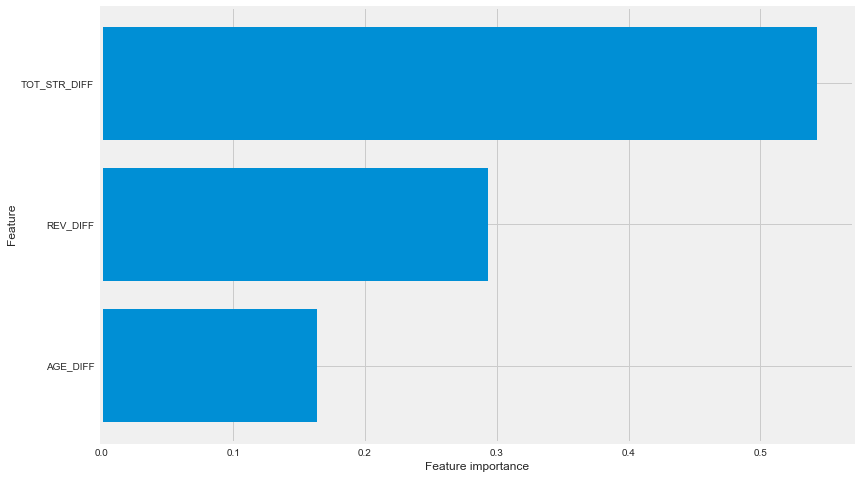


Confusion Matrix for Logistic Regression
----------------
Predicted  Blue  Red  All
True                     
Blue         33  274  307
Red          27  454  481
All          60  728  788

Confusion Matrix for Random Forest
----------------


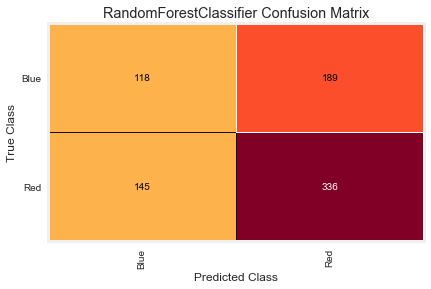

In [129]:
evaluate_models(X, y)

### Confusion Matrices show us that Random Forest compared to Logistic Regression is capable of predicting Labels in a more balanced way.
### In fact for Logistic Regression we have predicted 274 Red that were actually Blue, while insted for Random Forest is 189 

### As we can see our model performed decently overall, with an accuracy score of 61%.

### F1 score is 0.

### The most important feature is the 'age difference' followed by total strikes and reversals.

### 

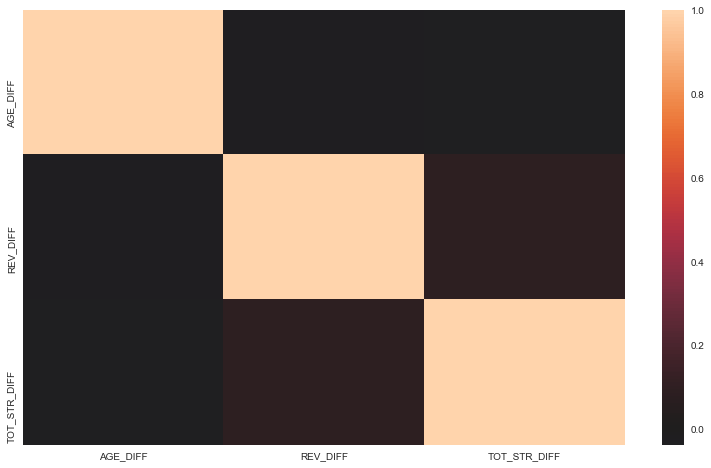

In [130]:
plt.figure(figsize=(12,8))
sns.heatmap(df1.corr(), center=0);

# Model 2 

In our second model we are  going to try 5 different top features resulting from our Random Forest feature importance analysis.

In [131]:
df2 = df[['AGE_DIFF','REV_DIFF', 'TOT_STR_DIFF', 'TOT_ROUND_FOUGHT_DIFF', 'TAKEDOWN_ATT_DIFF', 'Winner']]
df2.head()

,AGE_DIFF,REV_DIFF,TOT_STR_DIFF,TOT_ROUND_FOUGHT_DIFF,TAKEDOWN_ATT_DIFF,Winner
0,1.0,0.000000,45.500000,18.0,4.500000,Red
1,-1.0,0.142857,33.257143,-4.0,4.142857,Red
2,-1.0,0.036559,10.851613,-35.0,-1.227957,Red
3,3.0,-0.250000,-36.000000,11.0,-0.250000,Blue
4,-6.0,0.000000,-29.250000,-1.0,0.500000,Blue


In [132]:
X = df2.drop('Winner', axis=1)
y = df2['Winner']

LogReg Train score:  0.6591871295512278
LogReg Test score:  0.6218274111675127


DecTree GridSearch Train score:  0.6629974597798476
DecTree GridSearch Test score:  0.6129441624365483
Optimal Parameters: {'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}


RandFor GridSearch Train score:  0.6917866215071973
RandFor GridSearch Test score:  0.616751269035533
RandFor GridSearch F1 score:  0.17934782608695654
Optimal Parameters: {'criterion': 'entropy', 'max_depth': 6, 'min_samples_leaf': 6, 'min_samples_split': 5, 'n_estimators': 30}




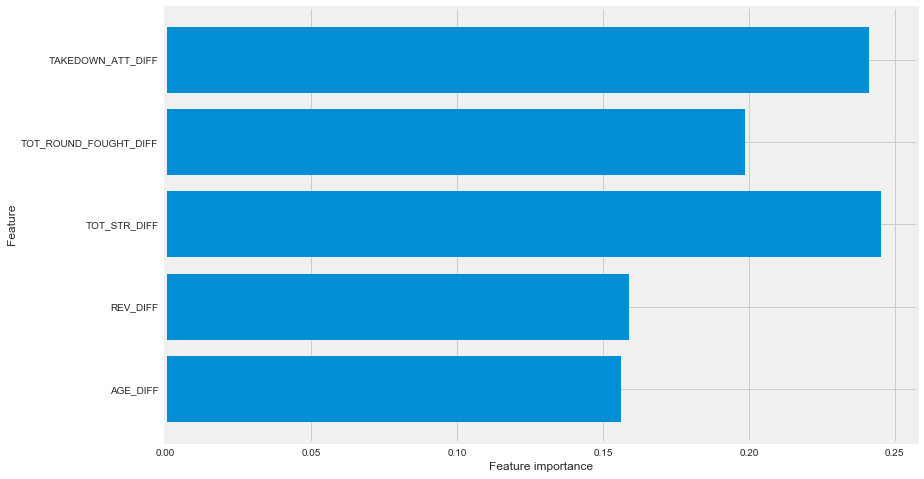


Confusion Matrix for Logistic Regression
----------------
Predicted  Blue  Red  All
True                     
Blue         43  264  307
Red          34  447  481
All          77  711  788

Confusion Matrix for Random Forest
----------------


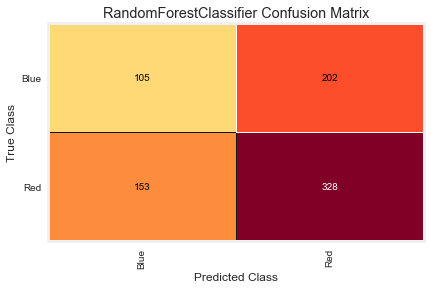

In [133]:
evaluate_models(X, y)

### Confusion Matrices show us that Random Forest compared to Logistic Regression is capable of predicting Labels in a more balanced way.
### In fact for Logistic Regression we have predicted 264 Red that were actually Blue, while insted for Random Forest is 202 

### As we can see our model performed decently overall, in fact it's still significantly better than we would expect from random guessing, which would have ~12% accuracy.

### The most important feature results being the age difference followed by the total number of rounds fought.

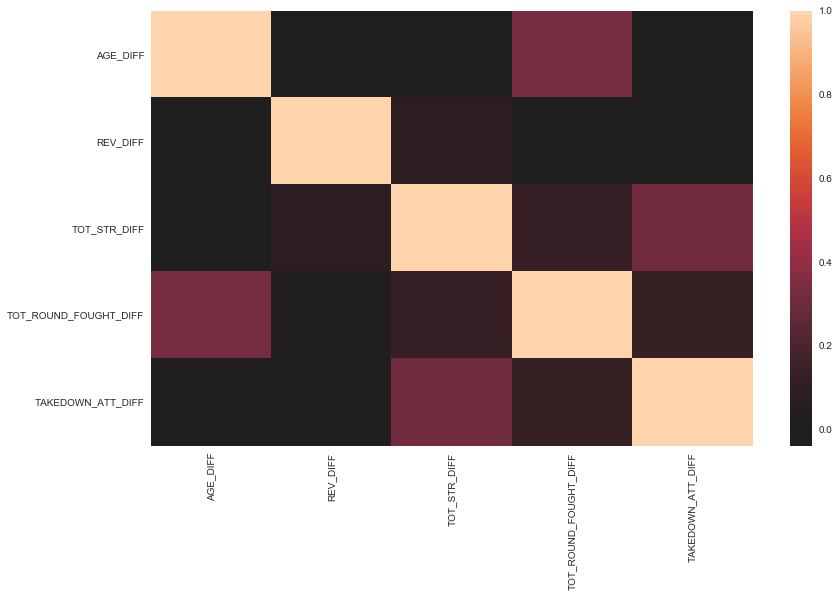

In [134]:
plt.figure(figsize=(12,8))
sns.heatmap(df2.corr(), center=0);

There's no correlation between these features as we can see from the heatmap.

# Model 3

In our third model we are  going to try 8 different top features resulting from our Random Forest feature importance analysis.

In [135]:
df3 = df[['AGE_DIFF','REV_DIFF', 'TOT_STR_DIFF', 'TOT_ROUND_FOUGHT_DIFF', 
          'TAKEDOWN_ATT_DIFF', 'SECONDS_FOUGHT_DIFF', 'HEAD_STR_DIFF', 'LEG_DIFF', 'Winner']]
df3.head()

,AGE_DIFF,REV_DIFF,TOT_STR_DIFF,TOT_ROUND_FOUGHT_DIFF,TAKEDOWN_ATT_DIFF,SECONDS_FOUGHT_DIFF,HEAD_STR_DIFF,LEG_DIFF,Winner
0,1.0,0.000000,45.500000,18.0,4.500000,323.200000,12.700000,-1.700000,Red
1,-1.0,0.142857,33.257143,-4.0,4.142857,213.000000,5.000000,4.514286,Red
2,-1.0,0.036559,10.851613,-35.0,-1.227957,22.529032,12.341935,-0.993548,Red
3,3.0,-0.250000,-36.000000,11.0,-0.250000,38.250000,-29.750000,9.000000,Blue
4,-6.0,0.000000,-29.250000,-1.0,0.500000,-759.250000,-22.250000,1.000000,Blue


In [136]:
X = df3.drop('Winner', axis=1)
y = df3['Winner']

LogReg Train score:  0.6663844199830652
LogReg Test score:  0.6218274111675127


DecTree GridSearch Train score:  0.663844199830652
DecTree GridSearch Test score:  0.616751269035533
Optimal Parameters: {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 4, 'min_samples_split': 2}


RandFor GridSearch Train score:  0.6981371718882303
RandFor GridSearch Test score:  0.6294416243654822
RandFor GridSearch F1 score:  0.20218579234972678
Optimal Parameters: {'criterion': 'gini', 'max_depth': 6, 'min_samples_leaf': 6, 'min_samples_split': 5, 'n_estimators': 30}




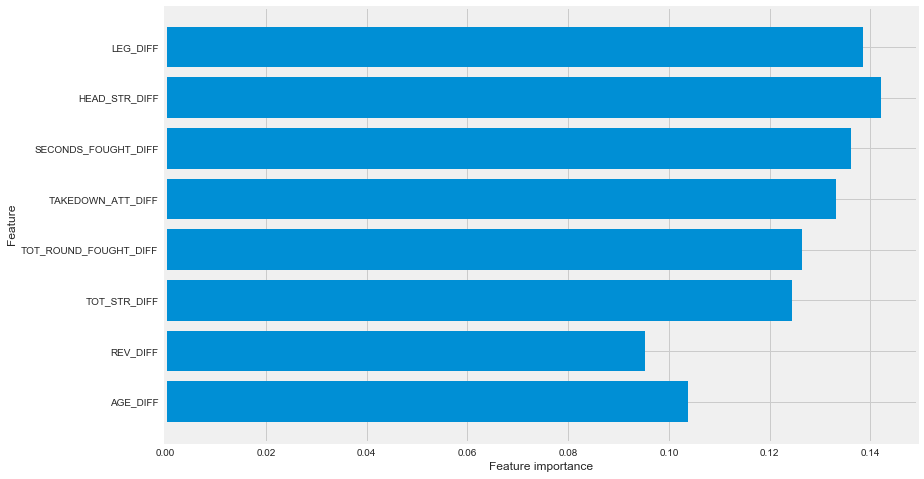


Confusion Matrix for Logistic Regression
----------------
Predicted  Blue  Red  All
True                     
Blue         50  257  307
Red          41  440  481
All          91  697  788

Confusion Matrix for Random Forest
----------------


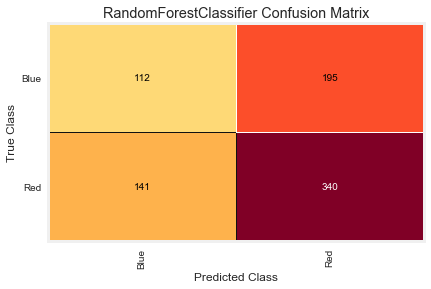

In [137]:
evaluate_models(X, y)

### Confusion Matrices show us that Random Forest compared to Logistic Regression is capable of predicting Labels in a more balanced way.
### In fact for Logistic Regression we have predicted 257 Red that were actually Blue, while insted for Random Forest is 195. 

### As we can see our model performed decently overall, in fact it's still significantly better than we would expect from random guessing, which would have ~13% accuracy.

### "Age difference" is still the most important feature while the second in this model is head strikes difference.

### In the third position we have 2 features that are expressing basically the same thing, total seconds fought and total rounds fought, indicating the overall experience of a fighter.

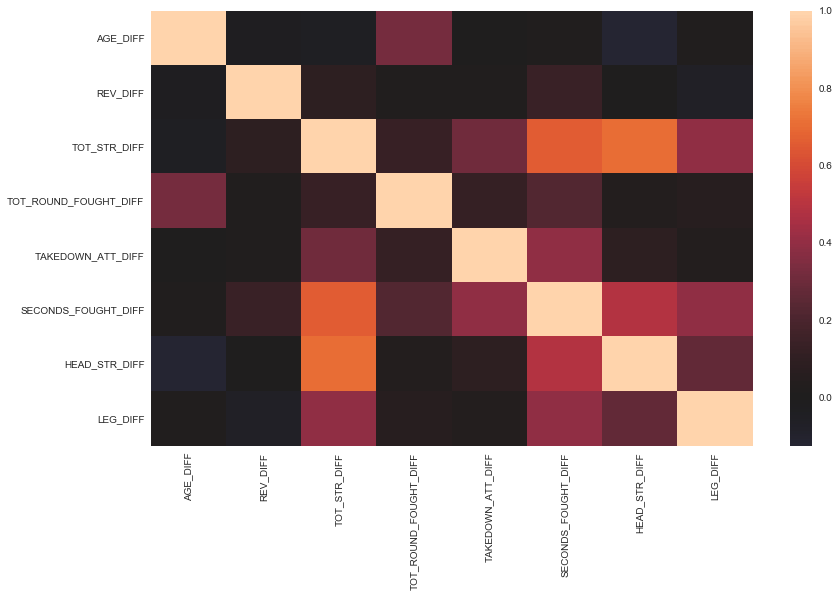

In [138]:
plt.figure(figsize=(12,8))
sns.heatmap(df3.corr(), center=0);

As we can see from the heatmap we found correlation between seconds fought and total strikes and head strikes and total strikes obviously as expected.

# Model 4

In our fourth model we are  going to try 12 different top features resulting from our Random Forest feature importance analysis.

In [139]:
df4 = df[['AGE_DIFF','REV_DIFF', 'TOT_STR_DIFF', 'TOT_ROUND_FOUGHT_DIFF', 
          'TAKEDOWN_ATT_DIFF', 'SECONDS_FOUGHT_DIFF', 'HEAD_STR_DIFF', 'LEG_DIFF',
          'TOT_LOSSES_DIFF', 'SIG_STR_ATT_DIFF', 'GROUND_STR_DIFF', 'TAKEDOWN_DIFF', 'Winner']]
df4.head()

,AGE_DIFF,REV_DIFF,TOT_STR_DIFF,TOT_ROUND_FOUGHT_DIFF,TAKEDOWN_ATT_DIFF,SECONDS_FOUGHT_DIFF,HEAD_STR_DIFF,LEG_DIFF,TOT_LOSSES_DIFF,SIG_STR_ATT_DIFF,GROUND_STR_DIFF,TAKEDOWN_DIFF,Winner
0,1.0,0.000000,45.500000,18.0,4.500000,323.200000,12.700000,-1.700000,1.0,36.000000,4.500000,1.700000,Red
1,-1.0,0.142857,33.257143,-4.0,4.142857,213.000000,5.000000,4.514286,-4.0,-23.042857,14.528571,1.928571,Red
2,-1.0,0.036559,10.851613,-35.0,-1.227957,22.529032,12.341935,-0.993548,-7.0,27.333333,0.460215,-0.277419,Red
3,3.0,-0.250000,-36.000000,11.0,-0.250000,38.250000,-29.750000,9.000000,2.0,-24.500000,-9.875000,-0.625000,Blue
4,-6.0,0.000000,-29.250000,-1.0,0.500000,-759.250000,-22.250000,1.000000,0.0,-141.250000,0.500000,0.000000,Blue


In [140]:
X = df4.drop('Winner', axis=1)
y = df4['Winner']

In [141]:
df['Winner'].value_counts()

Red     2015
Blue    1135
Name: Winner, dtype: int64

LogReg Train score:  0.6587637595258256
LogReg Test score:  0.6205583756345178


DecTree GridSearch Train score:  0.6748518204911093
DecTree GridSearch Test score:  0.6281725888324873
Optimal Parameters: {'criterion': 'entropy', 'max_depth': 4, 'min_samples_leaf': 4, 'min_samples_split': 2}


RandFor GridSearch Train score:  0.7087214225232854
RandFor GridSearch Test score:  0.6256345177664975
RandFor GridSearch F1 score:  0.2091152815013405
Optimal Parameters: {'criterion': 'gini', 'max_depth': 6, 'min_samples_leaf': 3, 'min_samples_split': 5, 'n_estimators': 100}




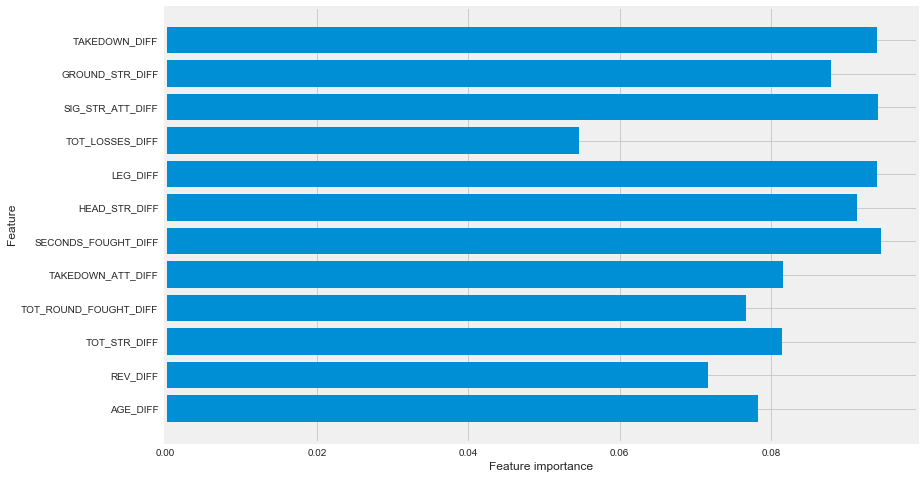


Confusion Matrix for Logistic Regression
----------------
Predicted  Blue  Red  All
True                     
Blue         55  252  307
Red          47  434  481
All         102  686  788

Confusion Matrix for Random Forest
----------------


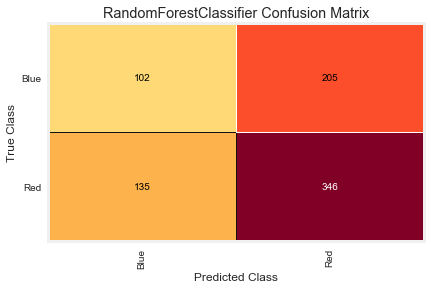

In [142]:
evaluate_models(X, y)

### Confusion Matrices show us that Random Forest compared to Logistic Regression is capable of predicting Labels in a more balanced way.
### In fact for Logistic Regression we have predicted 252 Red that were actually Blue, while insted for Random Forest is 205 

### As we can see our model performed decently overall, in fact it's still significantly better than we would expect from random guessing, which would have ~13% accuracy
# Top Model
### In this model our top feature becomes the total number of losses suffered by a fighter.
### An high number of losses as expected results being the top feature measuring a potential loss.
### In the second position we find 2 different features, "age difference"  and "takedowns".
### Results being so a really important feature the number of takedowns, in fact we can see that ground strikes is another really important feature following the 'overall experience' of a fighter.
### From the analysis results that ground strikes are decisive and being able for a fighter to perform takedowns makes him in a superior position overall in order to deliver those kind of strikes.
### Not surprising a lot of champions in different divisions have a background in Combat Sports as Wrestling and Sambo where the takedowns are one of the predominant techniques.
### Age is really important, younger fighter results being winners more often than older fighters, but also the experience, expressed in total round fought is really valuable.

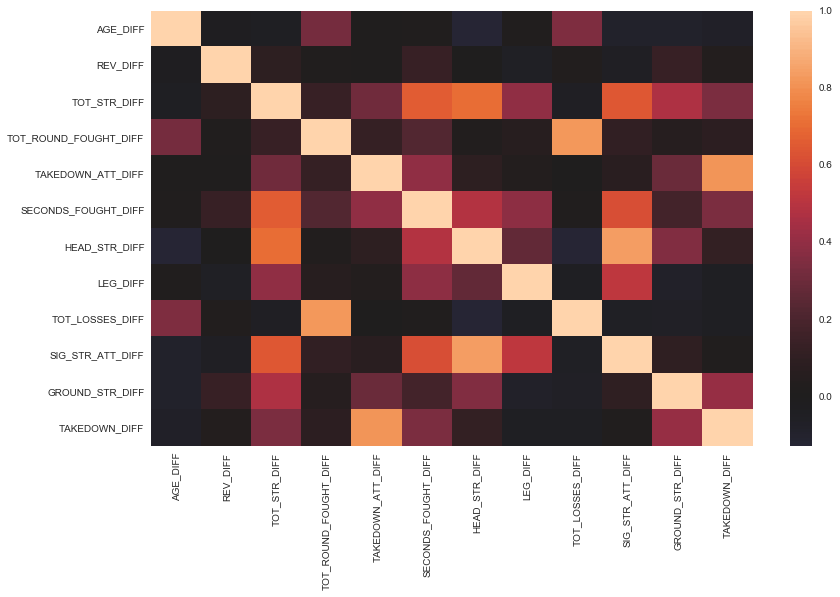

In [143]:
plt.figure(figsize=(12,8))
sns.heatmap(df4.corr(), center=0);

# Final Comments

## From our analysis, based on our prediction, we advice our clients when betting to consider in order of importance these factors:

# 1. Total Number of Losses of the Fighter

# 2. Age of the Fighter

# 3. Takedown Capabilities(Related Fighter Background Techniques)

# 4. Total Number of Rounds Fought

In order to get a better understanding of our result I'm going to weight balance manually the labels in our 'Winner' column.

Doing so we will have a model's result not affected by an higher number of 1 of the labels. 

# FINAL MODEL

# Label's Weight Balanced

In [144]:
df4.head()

,AGE_DIFF,REV_DIFF,TOT_STR_DIFF,TOT_ROUND_FOUGHT_DIFF,TAKEDOWN_ATT_DIFF,SECONDS_FOUGHT_DIFF,HEAD_STR_DIFF,LEG_DIFF,TOT_LOSSES_DIFF,SIG_STR_ATT_DIFF,GROUND_STR_DIFF,TAKEDOWN_DIFF,Winner
0,1.0,0.000000,45.500000,18.0,4.500000,323.200000,12.700000,-1.700000,1.0,36.000000,4.500000,1.700000,Red
1,-1.0,0.142857,33.257143,-4.0,4.142857,213.000000,5.000000,4.514286,-4.0,-23.042857,14.528571,1.928571,Red
2,-1.0,0.036559,10.851613,-35.0,-1.227957,22.529032,12.341935,-0.993548,-7.0,27.333333,0.460215,-0.277419,Red
3,3.0,-0.250000,-36.000000,11.0,-0.250000,38.250000,-29.750000,9.000000,2.0,-24.500000,-9.875000,-0.625000,Blue
4,-6.0,0.000000,-29.250000,-1.0,0.500000,-759.250000,-22.250000,1.000000,0.0,-141.250000,0.500000,0.000000,Blue


In [145]:
df4.shape

(3150, 13)

In [146]:
train = df4.head(2362)
test = df4.tail(788)

In [147]:
train['Winner'].value_counts()

Red     1359
Blue    1003
Name: Winner, dtype: int64

In [148]:
red_winner = train[train['Winner'] == 'Red'].sample(1003)

In [149]:
blue_winner = train[train['Winner'] == 'Blue']

In [150]:
train_new = pd.concat([red_winner, blue_winner])
train_new.head()

,AGE_DIFF,REV_DIFF,TOT_STR_DIFF,TOT_ROUND_FOUGHT_DIFF,TAKEDOWN_ATT_DIFF,SECONDS_FOUGHT_DIFF,HEAD_STR_DIFF,LEG_DIFF,TOT_LOSSES_DIFF,SIG_STR_ATT_DIFF,GROUND_STR_DIFF,TAKEDOWN_DIFF,Winner
1920,0.0,0.494737,53.921053,-15.0,0.105263,210.568421,7.263158,1.336842,-2.0,39.121053,3.452632,-0.178947,Red
1106,-5.0,-0.012500,6.667500,-28.0,-0.010000,-161.045000,12.462500,1.670000,-4.0,7.915000,0.387500,-0.240000,Red
1422,-6.0,-0.294118,-44.882353,-35.0,-5.647059,-515.147059,0.029412,-1.352941,-7.0,-27.441176,0.205882,-2.352941,Red
1657,11.0,0.142857,21.166667,42.0,5.690476,103.285714,-2.142857,-0.166667,5.0,8.833333,3.166667,1.380952,Red
2369,-1.0,0.000000,-0.950000,-1.0,-1.200000,-307.550000,-2.050000,-0.350000,2.0,-23.600000,-0.300000,-2.400000,Red


In [151]:
train_new['Winner'].value_counts()

Blue    1003
Red     1003
Name: Winner, dtype: int64

In [152]:
X_train = train_new.drop('Winner', axis=1)
y_train = train_new['Winner']

In [153]:
X_test = test.drop('Winner', axis=1)
y_test = test['Winner']

In [154]:
X_test.columns

Index(['AGE_DIFF', 'REV_DIFF', 'TOT_STR_DIFF', 'TOT_ROUND_FOUGHT_DIFF',
       'TAKEDOWN_ATT_DIFF', 'SECONDS_FOUGHT_DIFF', 'HEAD_STR_DIFF', 'LEG_DIFF',
       'TOT_LOSSES_DIFF', 'SIG_STR_ATT_DIFF', 'GROUND_STR_DIFF',
       'TAKEDOWN_DIFF'],
      dtype='object')

In [155]:
X_train.columns

Index(['AGE_DIFF', 'REV_DIFF', 'TOT_STR_DIFF', 'TOT_ROUND_FOUGHT_DIFF',
       'TAKEDOWN_ATT_DIFF', 'SECONDS_FOUGHT_DIFF', 'HEAD_STR_DIFF', 'LEG_DIFF',
       'TOT_LOSSES_DIFF', 'SIG_STR_ATT_DIFF', 'GROUND_STR_DIFF',
       'TAKEDOWN_DIFF'],
      dtype='object')

In [156]:
# Train a RF classifier
clf_rand_for = RandomForestClassifier(random_state=10)  
clf_rand_for.fit(X_train, y_train)  

# GridSearch
rf_param_grid = {
'class_weight': [None, 'balanced'],
'n_estimators': [10, 30, 100],
'criterion': ['gini', 'entropy'],
'max_depth': [None, 2, 6, 10],
'min_samples_split': [5, 10],
'min_samples_leaf': [3, 6]
}

# Instantiate GridSearchCV
rf_grid_search = GridSearchCV(clf_rand_for, rf_param_grid, cv=3)
rf_grid_search.fit(X_train, y_train)

GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=10, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'class_weight': [None, 'balanced'], 'n_estimators': [10, 30, 100], 'criterion': ['gini', 'entropy'], 'max_depth': [None, 2, 6, 10], 'min_samples_split': [5, 10], 'min_samples_leaf': [3, 6]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [157]:
print(f"Optimal Parameters: {rf_grid_search.best_params_}")

Optimal Parameters: {'class_weight': None, 'criterion': 'entropy', 'max_depth': 2, 'min_samples_leaf': 3, 'min_samples_split': 10, 'n_estimators': 100}


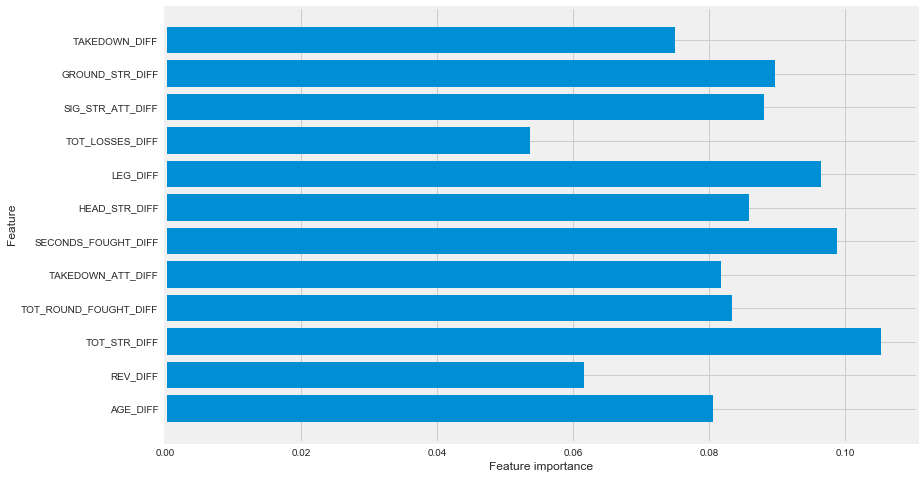

In [158]:
# Visualize feature_importances in a graph
n_features = X_train.shape[1]
plt.figure(figsize=(12,8))
plt.barh(range(n_features), clf_rand_for.feature_importances_, align='center') 
plt.yticks(np.arange(n_features), X_train.columns.values) 
plt.xlabel('Feature importance')
plt.ylabel('Feature')
plt.show();

In [159]:
rf_grid_search.score(X_train, y_train)

0.6181455633100698

In [160]:
rf_grid_search.score(X_test, y_test)

0.6294416243654822

In [161]:
y_pred = rf_grid_search.predict(X_test)

In [162]:
y_test_label = []
for x in y_test:
    if x == 'Red':
        y_test_label.append(0)
    else:
        y_test_label.append(1)
        
        
y_pred_label = []
for x in y_pred:
    if x == 'Red':
        y_pred_label.append(0)
    else:
        y_pred_label.append(1)
        

In [163]:
f1_score(y_test_label, y_pred_label)

0.2980769230769231

In [164]:
clf_rand_for.classes_

array(['Blue', 'Red'], dtype=object)

In [165]:
confusion_matrix(y_test_label, y_pred_label)

array([[434, 222],
       [ 70,  62]], dtype=int64)

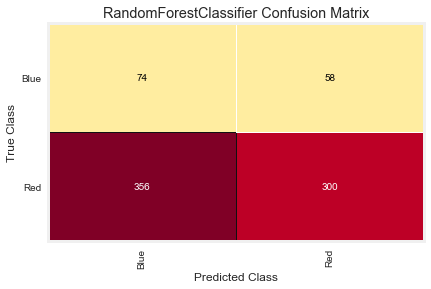

In [166]:
cm = ConfusionMatrix(clf_rand_for, classes=['Blue', 'Red'])
cm.fit(X_train, y_train)
cm.score(X_test, y_test)
cm.show();

### Confusion Matrices show us that for this Model, having balanced the Dataset manually, Random Forest is mistaking a lot of Blue labels that were actually Red.
### In fact with Random Forest we have predicted 346 Blue that were actually Red.
### In our specific problem this doesn't make a big difference, but it's interesting to notice that depending on the problem we would have instead decided to opt for a model or another based on this.
### As we know  Precision and Recall are two of the most basic evaluation metrics available to us. Precision measures how precise the predictions are, while Recall indicates what percentage of the classes we're interested in were actually captured by the model.
### The type of scores that we are using are the accuracy score and the f1 score in our case, as we know in fact the accuracy does not perform well with imbalanced data sets, while f1 penalizes the score when recall or precision are too different.

# F1 score improved slightly after our changes while accuracy stayed at 62%.
# Since this current F1 score is the best obtained this is our best Model.

# FIGHT PREDICTION:

# MCGREGOR VS CERRONE

We are now going to create a function capable of predicting a fight result based on our dataset.

In order to do so I'm initially going to create such model for a single fight, in this case Cerrone vs McGregor, and I'll be creating a function based on it that will predict whatever fight we select.

![https://raw.githubusercontent.com/illumi91/dsc-mod-5-project-online-ds-pt-051319/master/images/UFC-Fighters-Dark-Background-McGregor-vs-Cerrone-UFC-Logo.jpg](https://raw.githubusercontent.com/illumi91/dsc-mod-5-project-online-ds-pt-051319/master/images/UFC-Fighters-Dark-Background-McGregor-vs-Cerrone-UFC-Logo.jpg)

I'll start by creating 2 separate DataFrames, 1 for each fighter(color), in order to get the fighter's name from the Blue or the Red column

In [167]:
df_conor = df[(df['R_fighter'] == 'Conor McGregor') | (df['B_fighter'] == 'Conor McGregor')] 

In [168]:
df_cerrone = df[(df['R_fighter'] == 'Donald Cerrone') | (df['B_fighter'] == 'Donald Cerrone')] 

In [169]:
list(df.columns)

['R_fighter',
 'B_fighter',
 'Referee',
 'date',
 'location',
 'Winner',
 'title_bout',
 'weight_class',
 'no_of_rounds',
 'B_current_lose_streak',
 'B_current_win_streak',
 'B_draw',
 'B_avg_BODY_att',
 'B_avg_BODY_landed',
 'B_avg_CLINCH_att',
 'B_avg_CLINCH_landed',
 'B_avg_DISTANCE_att',
 'B_avg_DISTANCE_landed',
 'B_avg_GROUND_att',
 'B_avg_GROUND_landed',
 'B_avg_HEAD_att',
 'B_avg_HEAD_landed',
 'B_avg_KD',
 'B_avg_LEG_att',
 'B_avg_LEG_landed',
 'B_avg_PASS',
 'B_avg_REV',
 'B_avg_SIG_STR_att',
 'B_avg_SIG_STR_landed',
 'B_avg_SIG_STR_pct',
 'B_avg_SUB_ATT',
 'B_avg_TD_att',
 'B_avg_TD_landed',
 'B_avg_TD_pct',
 'B_avg_TOTAL_STR_att',
 'B_avg_TOTAL_STR_landed',
 'B_longest_win_streak',
 'B_losses',
 'B_total_rounds_fought',
 'B_total_time_fought(seconds)',
 'B_total_title_bouts',
 'B_win_by_Decision_Majority',
 'B_win_by_Decision_Split',
 'B_win_by_Decision_Unanimous',
 'B_win_by_KO/TKO',
 'B_win_by_Submission',
 'B_wins',
 'B_Stance',
 'B_Height_cms',
 'B_Reach_cms',
 'B_Weigh

Next step I'm going to find all the features used on my previous model to get later on the prediction.

# AGE

In [173]:
df_conor.reset_index(inplace=True)

In [281]:
age_diff = df_conor.loc[0, 'B_age'] - df_cerrone.loc[2,'B_age'] 
age_diff

-6.0

In [177]:
'B_avg_TD_landed'

'B_avg_TD_landed'

In [178]:
df_conor['B_avg_TD_landed']

0    0.500000
1    0.555556
2    0.625000
3    0.714286
4    0.833333
5    1.000000
6    0.722222
7    1.666667
8    2.166667
9    0.000000
Name: B_avg_TD_landed, dtype: float64

# TAKEDOWNS

In [179]:
conor_td_landed= []
for index, row in df_conor.iterrows():
    if row['R_fighter'] == 'Conor McGregor':
        conor_td_landed.append(row['R_avg_TD_landed'])
        
    else:
        conor_td_landed.append(row['B_avg_TD_landed'])
        
conor_td_landed

[0.5,
 0.5555555555555556,
 0.625,
 0.7142857142857143,
 0.8333333333333334,
 1.0,
 1.25,
 1.6666666666666667,
 2.0,
 0.0]

In [180]:
cerrone_td_landed= []
for index, row in df_cerrone.iterrows():
    if row['R_fighter'] == 'Donald Cerrone':
        cerrone_td_landed.append(row['R_avg_TD_landed'])
        
    else:
        cerrone_td_landed.append(row['B_avg_TD_landed'])
        
cerrone_td_landed[:10]

[0.6774193548387096,
 0.7,
 0.6896551724137931,
 0.7142857142857143,
 0.7037037037037037,
 0.7307692307692307,
 0.72,
 0.7083333333333334,
 0.7391304347826086,
 0.7727272727272727]

In [181]:
td_landed_mean = np.mean(np.array(conor_td_landed) - np.array(cerrone_td_landed[:10]))

# GROUND STRIKES

In [182]:
conor_ground_landed= []
for index, row in df_conor.iterrows():
    if row['R_fighter'] == 'Conor McGregor':
        conor_ground_landed.append(row['R_avg_GROUND_landed'])
        
    else:
        conor_ground_landed.append(row['B_avg_GROUND_landed'])
        
conor_ground_landed

[4.9,
 4.888888888888889,
 5.5,
 6.0,
 6.666666666666668,
 6.6,
 6.5,
 7.333333333333332,
 7.0,
 5.0]

In [183]:
cerrone_ground_landed= []
for index, row in df_cerrone.iterrows():
    if row['R_fighter'] == 'Donald Cerrone':
        cerrone_ground_landed.append(row['R_avg_GROUND_landed'])
        
    else:
        cerrone_ground_landed.append(row['B_avg_GROUND_landed'])
        
cerrone_ground_landed[:10]

[3.806451612903226,
 3.733333333333333,
 3.3793103448275863,
 3.5,
 3.592592592592593,
 3.615384615384616,
 3.76,
 3.875,
 4.043478260869565,
 4.227272727272728]

In [184]:
ground_landed_mean = np.mean(np.array(conor_ground_landed) - np.array(cerrone_ground_landed[:10]))
ground_landed_mean

2.285606540170524

# SIGNIF STRIKES

In [185]:
conor_sig_landed= []
for index, row in df_conor.iterrows():
    if row['R_fighter'] == 'Conor McGregor':
        conor_sig_landed.append(row['R_avg_SIG_STR_landed'])
        
    else:
        conor_sig_landed.append(row['B_avg_SIG_STR_landed'])
        
conor_sig_landed

[47.3,
 49.0,
 34.625,
 30.857142857142854,
 35.166666666666664,
 33.0,
 25.25,
 30.66666666666667,
 37.0,
 21.0]

In [186]:
cerrone_sig_landed= []
for index, row in df_cerrone.iterrows():
    if row['R_fighter'] == 'Donald Cerrone':
        cerrone_sig_landed.append(row['R_avg_SIG_STR_landed'])
        
    else:
        cerrone_sig_landed.append(row['B_avg_SIG_STR_landed'])
        
cerrone_sig_landed[:10]

[46.774193548387096,
 43.73333333333333,
 42.48275862068965,
 43.67857142857143,
 43.074074074074076,
 43.653846153846146,
 44.84,
 43.29166666666666,
 43.8695652173913,
 43.0]

In [187]:
sig_landed_mean = np.mean(np.array(conor_sig_landed) - np.array(cerrone_sig_landed[:10]))
sig_landed_mean

-9.45325328524835

# TOTAL LOSSES

In [188]:
conor_tot_losses= []
for index, row in df_conor.iterrows():
    if row['R_fighter'] == 'Conor McGregor':
        conor_tot_losses.append(row['R_losses'])
        
    else:
        conor_tot_losses.append(row['B_losses'])
        
conor_tot_losses[:1]

[1.0]

In [189]:
cerrone_tot_losses= []
for index, row in df_cerrone.iterrows():
    if row['R_fighter'] == 'Donald Cerrone':
        cerrone_tot_losses.append(row['R_losses'])
        
    else:
        cerrone_tot_losses.append(row['B_losses'])
        
cerrone_tot_losses[:1]

[8.0]

In [190]:
tot_losses = np.array(conor_tot_losses[:1]) - np.array(cerrone_tot_losses[:1])
tot_losses

array([-7.])

# LEG STRIKES DIFFERENCE

In [191]:
conor_leg_landed= []
for index, row in df_conor.iterrows():
    if row['R_fighter'] == 'Conor McGregor':
        conor_leg_landed.append(row['R_avg_LEG_landed'])
        
    else:
        conor_leg_landed.append(row['B_avg_LEG_landed'])
        
conor_leg_landed

[6.7,
 7.333333333333332,
 3.25,
 2.7142857142857144,
 3.0,
 3.6,
 3.75,
 5.0,
 7.5,
 0.0]

In [192]:
cerrone_leg_landed= []
for index, row in df_cerrone.iterrows():
    if row['R_fighter'] == 'Donald Cerrone':
        cerrone_leg_landed.append(row['R_avg_LEG_landed'])
        
    else:
        cerrone_leg_landed.append(row['B_avg_LEG_landed'])
        
cerrone_leg_landed[:10]

[12.193548387096774,
 11.466666666666667,
 11.724137931034482,
 12.035714285714285,
 12.0,
 12.423076923076925,
 12.64,
 12.916666666666664,
 12.91304347826087,
 13.045454545454545]

In [193]:
leg_landed_mean = np.mean(np.array(conor_leg_landed) - np.array(cerrone_leg_landed[:10]))
leg_landed_mean

-8.051068983635217

# HEAD STRIKES

In [194]:
conor_head_landed= []
for index, row in df_conor.iterrows():
    if row['R_fighter'] == 'Conor McGregor':
        conor_head_landed.append(row['R_avg_HEAD_landed'])
        
    else:
        conor_head_landed.append(row['B_avg_HEAD_landed'])
        
conor_head_landed

[33.0, 34.0, 26.0, 23.0, 26.16666666666667, 25.2, 19.25, 23.0, 27.0, 20.0]

In [195]:
cerrone_head_landed= []
for index, row in df_cerrone.iterrows():
    if row['R_fighter'] == 'Donald Cerrone':
        cerrone_head_landed.append(row['R_avg_HEAD_landed'])
        
    else:
        cerrone_head_landed.append(row['B_avg_HEAD_landed'])
        
cerrone_head_landed[:10]

[23.258064516129032,
 21.133333333333333,
 19.86206896551724,
 20.5,
 20.62962962962963,
 20.80769230769231,
 21.56,
 20.375,
 20.82608695652174,
 19.681818181818183]

In [196]:
head_landed_mean = np.mean(np.array(conor_head_landed) - np.array(cerrone_head_landed[:10]))
head_landed_mean

4.79829727760252

# SECONDS FOUGHT

In [197]:
conor_seconds= []
for index, row in df_conor.iterrows():
    if row['R_fighter'] == 'Conor McGregor':
        conor_seconds.append(row['R_total_time_fought(seconds)'])
        
    else:
        conor_seconds.append(row['B_total_time_fought(seconds)'])
        
conor_seconds
tot_conor_sec = np.sum(conor_seconds)

In [198]:
cerrone_seconds= []
for index, row in df_cerrone.iterrows():
    if row['R_fighter'] == 'Donald Cerrone':
        cerrone_seconds.append(row['R_total_time_fought(seconds)'])
        
    else:
        cerrone_seconds.append(row['B_total_time_fought(seconds)'])
        
cerrone_seconds
tot_cerrone_sec = np.sum(cerrone_seconds)

In [199]:
tot_seconds_diff = tot_conor_sec - tot_cerrone_sec
tot_seconds_diff

-11637.112748742657

# TOT ROUND FOUGHT

In [200]:
conor_rounds= []
for index, row in df_conor.iterrows():
    if row['R_fighter'] == 'Conor McGregor':
        conor_rounds.append(row['R_total_rounds_fought'])
        
    else:
        conor_rounds.append(row['B_total_rounds_fought'])
        
conor_rounds[0]

20.0

In [201]:
cerrone_rounds= []
for index, row in df_cerrone.iterrows():
    if row['R_fighter'] == 'Donald Cerrone':
        cerrone_rounds.append(row['R_total_rounds_fought'])
        
    else:
        cerrone_rounds.append(row['B_total_rounds_fought'])
        
cerrone_rounds[0]

68.0

In [202]:
tot_rounds_diff =  conor_rounds[0] - cerrone_rounds[0]
tot_rounds_diff

-48.0

# TAKEDOWN ATT

In [203]:
conor_td_att= []
for index, row in df_conor.iterrows():
    if row['R_fighter'] == 'Conor McGregor':
        conor_td_att.append(row['R_avg_TD_att'])
        
    else:
        conor_td_att.append(row['B_avg_TD_att'])
        
conor_td_att

[0.8,
 0.8888888888888888,
 0.875,
 0.8571428571428571,
 1.0,
 1.2,
 1.5,
 2.0,
 2.5,
 0.0]

In [204]:
cerrone_td_att= []
for index, row in df_cerrone.iterrows():
    if row['R_fighter'] == 'Donald Cerrone':
        cerrone_td_att.append(row['R_avg_TD_att'])
        
    else:
        cerrone_td_att.append(row['B_avg_TD_att'])
        
cerrone_td_att[:10]

[2.161290322580645,
 2.2333333333333334,
 2.2758620689655173,
 2.321428571428572,
 2.074074074074074,
 2.1153846153846154,
 2.12,
 1.7916666666666667,
 1.826086956521739,
 1.7727272727272727]

In [205]:
td_att_mean = np.mean(np.array(conor_td_att) - np.array(cerrone_td_att[:10]))
td_att_mean

-0.907082213565069

# TOT STRIKES

In [206]:
conor_tot_strikes= []
for index, row in df_conor.iterrows():
    if row['R_fighter'] == 'Conor McGregor':
        conor_tot_strikes.append(row['R_avg_TOTAL_STR_landed'])
        
    else:
        conor_tot_strikes.append(row['B_avg_TOTAL_STR_landed'])
        
conor_tot_strikes

[58.6,
 60.66666666666666,
 43.625,
 40.42857142857143,
 46.33333333333334,
 40.8,
 34.75,
 43.33333333333334,
 46.5,
 22.0]

In [207]:
cerrone_tot_strikes= []
for index, row in df_cerrone.iterrows():
    if row['R_fighter'] == 'Donald Cerrone':
        cerrone_tot_strikes.append(row['R_avg_TOTAL_STR_landed'])
        
    else:
        cerrone_tot_strikes.append(row['B_avg_TOTAL_STR_landed'])
        
cerrone_tot_strikes[:10]

[52.548387096774185,
 49.63333333333333,
 48.55172413793103,
 49.92857142857143,
 49.407407407407405,
 50.230769230769226,
 51.68,
 49.70833333333334,
 50.56521739130435,
 49.95454545454545]

In [208]:
tot_strikes_mean = np.mean(np.array(conor_tot_strikes) - np.array(cerrone_tot_strikes[:10]))
tot_strikes_mean

-6.517138405206498

# REVERSALS

In [209]:
conor_reversals= []
for index, row in df_conor.iterrows():
    if row['R_fighter'] == 'Conor McGregor':
        conor_reversals.append(row['R_avg_REV'])
        
    else:
        conor_reversals.append(row['B_avg_REV'])
        
con_rev = np.mean(conor_reversals)

In [210]:
cerrone_reversals= []
for index, row in df_cerrone.iterrows():
    if row['R_fighter'] == 'Donald Cerrone':
        cerrone_reversals.append(row['R_avg_REV'])
        
    else:
        cerrone_reversals.append(row['B_avg_REV'])
        
cerr_rev = np.mean(cerrone_reversals)

In [211]:
reversals = con_rev - cerr_rev
td_att_mean

-0.907082213565069

# ALL FEATURES

In [212]:
age_diff

-6.0

In [213]:
td_landed_mean

0.19888170529869037

In [214]:
ground_landed_mean

2.285606540170524

In [215]:
sig_landed_mean

-9.45325328524835

In [216]:
leg_landed_mean

-8.051068983635217

In [217]:
tot_losses

array([-7.])

In [218]:
tot_rounds_diff

-48.0

In [219]:
tot_seconds_diff

-11637.112748742657

In [220]:
head_landed_mean

4.79829727760252

In [221]:
td_att_mean

-0.907082213565069

In [222]:
tot_strikes_mean

-6.517138405206498

In [223]:
reversals

-0.031958129200223666

# CREATE ARRAY CONTAINING FEATURES

In [225]:
cerrone_vs_mcgregor= np.array([age_diff,reversals,tot_strikes_mean, tot_rounds_diff, td_att_mean, 
          tot_seconds_diff,head_landed_mean,leg_landed_mean,tot_losses,sig_landed_mean,
          ground_landed_mean,td_landed_mean])

In [226]:
rf_grid_search.classes_

array(['Blue', 'Red'], dtype=object)

# McGregor => RED
# Cerrone => BLUE

In [231]:
pred = rf_grid_search.predict(cerrone_vs_mcgregor.reshape(1, -1))

In [228]:
rf_grid_search.predict_proba(cerrone_vs_mcgregor.reshape(1, -1))

array([[0.44851509, 0.55148491]])

### After building our Model we can see that is predicting McGregor to win by 55%

# FUNCTION FOR PREDICTION FIGHTS

In [275]:
def predict_fight(Red, Blue):
    
    df_red = df[(df['R_fighter'] == Red) | (df['B_fighter'] == Red)] 
    df_blue = df[(df['R_fighter'] == Blue) | (df['B_fighter'] == Blue)] 
    
    #Age
    df_red.reset_index(inplace=True)
    if df_red.loc[0, 'R_fighter'] == Red:
        red_age = df_red.loc[0, 'R_age']
    else:
        red_age = df_red.loc[0, 'B_age']
    
    
    df_blue.reset_index(inplace=True)
    if df_blue.loc[0, 'R_fighter'] == Blue:
        blue_age = df_blue.loc[0, 'R_age']
    else:
        blue_age = df_blue.loc[0, 'B_age']
    
    age_difference = red_age - blue_age

    #Takedown Landed
    red_td_landed= []
    for index, row in df_red.iterrows():
        if row['R_fighter'] == Red:
            red_td_landed.append(row['R_avg_TD_landed'])

        else:
            red_td_landed.append(row['B_avg_TD_landed'])
            
    
    blue_td_landed= []
    for index, row in df_blue.iterrows():
        if row['R_fighter'] == Blue:
            blue_td_landed.append(row['R_avg_TD_landed'])

        else:
            blue_td_landed.append(row['B_avg_TD_landed'])
            
    td_landed_diff = np.mean(red_td_landed[:5]) - np.mean(blue_td_landed[:5])
    
    #Ground Strikes
    red_ground_landed= []
    for index, row in df_red.iterrows():
        if row['R_fighter'] == Red:
            red_ground_landed.append(row['R_avg_GROUND_landed'])

        else:
            red_ground_landed.append(row['B_avg_GROUND_landed'])


    blue_ground_landed= []
    for index, row in df_blue.iterrows():
        if row['R_fighter'] == Blue:
            blue_ground_landed.append(row['R_avg_GROUND_landed'])

        else:
            blue_ground_landed.append(row['B_avg_GROUND_landed'])

    
    gr_landed_diff = np.mean(red_ground_landed[:5]) - np.mean(blue_ground_landed[:5])
    
    #significant strikes
    
    red_sig_landed= []
    for index, row in df_red.iterrows():
        if row['R_fighter'] == Red:
            red_sig_landed.append(row['R_avg_SIG_STR_landed'])

        else:
            red_sig_landed.append(row['B_avg_SIG_STR_landed'])   
    

    blue_sig_landed= []
    for index, row in df_blue.iterrows():
        if row['R_fighter'] == Blue:
            blue_sig_landed.append(row['R_avg_SIG_STR_landed'])

        else:
            blue_sig_landed.append(row['B_avg_SIG_STR_landed'])

    
    sign_land_diff = np.mean(red_sig_landed[:5]) - np.mean(blue_sig_landed[:5])

    #Total Losses 
    red_tot_losses= []
    for index, row in df_red.iterrows():
        if row['R_fighter'] == Red:
            red_tot_losses.append(row['R_losses'])

        else:
            red_tot_losses.append(row['B_losses'])

    blue_tot_losses= []
    for index, row in df_blue.iterrows():
        if row['R_fighter'] == Blue:
            blue_tot_losses.append(row['R_losses'])

        else:
            blue_tot_losses.append(row['B_losses'])

    
    tot_losses_diff = np.array(red_tot_losses[:1]) - np.array(blue_tot_losses[:1])
    
    #Leg Strikes
    red_leg_landed= []
    for index, row in df_red.iterrows():
        if row['R_fighter'] == Red:
            red_leg_landed.append(row['R_avg_LEG_landed'])

        else:
            red_leg_landed.append(row['B_avg_LEG_landed'])
        

    blue_leg_landed= []
    for index, row in df_blue.iterrows():
        if row['R_fighter'] == Blue:
            blue_leg_landed.append(row['R_avg_LEG_landed'])

        else:
            cerrone_leg_landed.append(row['B_avg_LEG_landed'])

    leg_land_diff = np.mean(red_leg_landed[:5]) - np.mean(blue_leg_landed[:5])
    
    #Head Strikes
    red_head_landed= []
    for index, row in df_red.iterrows():
        if row['R_fighter'] == Red:
            red_head_landed.append(row['R_avg_HEAD_landed'])

        else:
            red_head_landed.append(row['B_avg_HEAD_landed'])

    blue_head_landed= []
    for index, row in df_blue.iterrows():
        if row['R_fighter'] == Blue:
            blue_head_landed.append(row['R_avg_HEAD_landed'])

        else:
            blue_head_landed.append(row['B_avg_HEAD_landed'])

    head_land_diff = np.mean(red_head_landed[:5]) - np.mean(blue_head_landed[:5]) 
    
    #Total Seconds Fought
    red_seconds= []
    for index, row in df_red.iterrows():
        if row['R_fighter'] == Red:
            red_seconds.append(row['R_total_time_fought(seconds)'])

        else:
            red_seconds.append(row['B_total_time_fought(seconds)'])

    tot_red_sec = np.sum(red_seconds)
    
    blue_seconds= []
    for index, row in df_blue.iterrows():
        if row['R_fighter'] == Blue:
            blue_seconds.append(row['R_total_time_fought(seconds)'])

        else:
            blue_seconds.append(row['B_total_time_fought(seconds)'])

    tot_blue_sec = np.sum(blue_seconds)

    tot_seconds_diff = tot_red_sec - tot_blue_sec
    
    #Total Rounds Fought
    red_rounds= []
    for index, row in df_red.iterrows():
        if row['R_fighter'] == Red:
            red_rounds.append(row['R_total_rounds_fought'])

        else:
            red_rounds.append(row['B_total_rounds_fought'])

    blue_rounds= []
    for index, row in df_blue.iterrows():
        if row['R_fighter'] == Blue:
            blue_rounds.append(row['R_total_rounds_fought'])

        else:
            blue_rounds.append(row['B_total_rounds_fought'])

    tot_rounds_diff =  red_rounds[0] - blue_rounds[0]

    #Takedowns Attempted
    red_td_att= []
    for index, row in df_red.iterrows():
        if row['R_fighter'] == Red:
            red_td_att.append(row['R_avg_TD_att'])

        else:
            red_td_att.append(row['B_avg_TD_att'])

    blue_td_att= []
    for index, row in df_blue.iterrows():
        if row['R_fighter'] == Blue:
            blue_td_att.append(row['R_avg_TD_att'])

        else:
            blue_td_att.append(row['B_avg_TD_att'])

    td_att_diff = np.mean(red_td_att[:5]) - np.mean(blue_td_att)
    
    #Total Strikes
    red_tot_strikes= []
    for index, row in df_red.iterrows():
        if row['R_fighter'] == Red:
            red_tot_strikes.append(row['R_avg_TOTAL_STR_landed'])

        else:
            red_tot_strikes.append(row['B_avg_TOTAL_STR_landed'])

    blue_tot_strikes= []
    for index, row in df_blue.iterrows():
        if row['R_fighter'] == Blue:
            blue_tot_strikes.append(row['R_avg_TOTAL_STR_landed'])

        else:
            blue_tot_strikes.append(row['B_avg_TOTAL_STR_landed'])

    tot_strikes_diff = np.mean(red_tot_strikes) - np.mean(blue_tot_strikes)
 
    #Reversals
    red_reversals= []
    for index, row in df_red.iterrows():
        if row['R_fighter'] == Red:
            red_reversals.append(row['R_avg_REV'])

        else:
            red_reversals.append(row['B_avg_REV'])

    blue_reversals= []
    for index, row in df_blue.iterrows():
        if row['R_fighter'] == Blue:
            blue_reversals.append(row['R_avg_REV'])

        else:
            blue_reversals.append(row['B_avg_REV'])

    tot_rev_diff = np.mean(red_reversals) - np.mean(blue_reversals)
    
    #Create Array Containing All Features
    red_vs_blue= np.array([age_difference,tot_rev_diff,tot_strikes_diff, tot_rounds_diff, td_att_diff, 
          tot_seconds_diff,head_land_diff,leg_land_diff,tot_losses_diff,sign_land_diff,
          gr_landed_diff,td_landed_diff])
    
    #Get Prediction
    prediction = rf_grid_search.predict(red_vs_blue.reshape(1, -1))
    prediction_prob= rf_grid_search.predict_proba(red_vs_blue.reshape(1, -1))
    
    if prediction[0] == 'Red':
        print(Red + ' predicted to win at ' + str(np.round(prediction_prob[0][1] * 100, 2)) + '%.')
        
    else:
        print(Blue + ' predicted to win at ' + str(np.round(prediction_prob[0][0] * 100, 2)) + '%.')
    

    
    return prediction, prediction_prob

    #age_difference, td_landed_diff, gr_landed_diff, sign_land_diff, tot_losses_diff, leg_land_diff,\
    #head_land_diff, tot_seconds_diff, tot_rounds_diff, td_att_diff, tot_strikes_diff, tot_rev_diff,\

# Call Function And Obtain Prediction

In [277]:
predict_fight('Conor McGregor', 'Ronda Rousey');

Conor McGregor predicted to win at 51.79%.


# It's important to notice that:
# -The prediction is based on the fighter's last 5 fights.

# -The model was trained on data from the actual fights between the 2     fighters.